In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Load dataset
#df = pd.read_excel('/content/Online Retail Data Set.xlsx')

Saving Midfielders.csv to Midfielders.csv


In [ ]:
#read data
df1 = pd.read_csv('CenterBacks.csv', encoding='ISO-8859-1')
df2 = pd.read_csv('AtMid_Wingers.csv', encoding='ISO-8859-1')
df3 = pd.read_csv('Forwards.csv', encoding='ISO-8859-1')
df4 = pd.read_csv('FullBacks.csv', encoding='ISO-8859-1')
df5 = pd.read_csv('GoalKeepers.csv', encoding='ISO-8859-1')
df6 = pd.read_csv('Midfielders.csv', encoding='ISO-8859-1')

In [ ]:
example1 = "/content/ATTRIBUTE_NAMES.txt"
file1 = open(example1, "r")

In [ ]:
# Tambahkan kolom 'Position' ke masing-masing dataframe
df5['Position'] = 'Goalkeeper'
df1['Position'] = 'Center Back'
df4['Position'] = 'Full Back'
df6['Position'] = 'Midfielder'
df2['Position'] = 'Attacking Midfielder / Winger'
df3['Position'] = 'Forward'

# Gabungkan semua dataframe
df_all = pd.concat([df5, df1, df4, df6, df2, df3], ignore_index=True)

# Tampilkan contoh data
df_all.head()


Unnamed: 0                Name  \
0           0  Julen Agirrezabala   
1           1      DoÄan Alemdar   
2           2             Alisson   
3           3     Alphonse Areola   
4           4   Kepa Arrizabalaga   

                                    Attribute Vector  \
0  [-0.07, 0.8, 68.4, 0.3, 28.6, 33.73, 29.6, 8.2...   
1  [-0.47, 1.85, 54.5, 0.29, 50.0, 20.0, 33.64, 4...   
2  [0.24, 1.22, 70.3, 0.34, 40.0, 37.8, 40.44, 18...   
3  [0.02, 0.62, 81.1, 0.2, 0.0, 46.2, 29.69, 42.0...   
4  [0.18, 1.09, 74.2, 0.29, 0.0, 32.4, 37.52, 18....   

                                         Percentiles    Position  
0   [35, 96, 27, 81, 53, 28, 27, 83, 96, 98, 73, 62]  Goalkeeper  
1  [2, 10, 1, 72, 92, 31, 27, 73, 68, 95, 63, 33,...  Goalkeeper  
2  [97, 64, 38, 99, 83, 81, 74, 6, 8, 7, 65, 99, 98]  Goalkeeper  
3  [44, 99, 97, 1, 27, 92, 12, 58, 14, 75, 9, 13,...  Goalkeeper  
4  [89, 76, 72, 72, 23, 69, 54, 7, 28, 16, 31, 89...  Goalkeeper

In [ ]:
# Cek NaN
print(df_all.isna().sum())
print(df_all[df_all.isna().any(axis=1)])
print(df_all.isna().sum().sum())

Unnamed: 0          0
Name                0
Attribute Vector    0
Percentiles         0
Position            0
dtype: int64
Empty DataFrame
Columns: [Unnamed: 0, Name, Attribute Vector, Percentiles, Position]
Index: []
0


In [ ]:
import ast

# Parsing string jadi list angka (fungsi di bawah ini hanya sekali run jika error bisa ditambahkan # dulu)
# bisa error karena type data sudah diubah ke list
df_all['Attribute Vector'] = df_all['Attribute Vector'].apply(ast.literal_eval)
df_all['Percentiles'] = df_all['Percentiles'].apply(ast.literal_eval)

# Cek hasilnya
print(type(df_all['Attribute Vector'][0]))  # <class 'list'>
print(df_all['Attribute Vector'][0])        # lihat isi listnya

print(type(df_all['Percentiles'][0]))
print(df_all['Percentiles'][0])

<class 'list'>
[-0.07, 0.8, 68.4, 0.3, 28.6, 33.73, 29.6, 8.27, 55.4, 11.5, 1.33, 15.4]
<class 'list'>
[35, 96, 27, 81, 53, 28, 27, 83, 96, 98, 73, 62]


In [ ]:
# cek jumlah elemen
df_all['attr_len'] = df_all['Attribute Vector'].apply(len)
print(df_all['attr_len'].value_counts())  # Harus sesuai dengan posisi


attr_len
19    1841
13     130
12       8
Name: count, dtype: int64


In [ ]:
# cek nama posisi
df_all['Position'] = df_all['Position'].str.strip().str.title()
print(df_all['Position'].unique())


['Goalkeeper' 'Center Back' 'Full Back' 'Midfielder'
 'Attacking Midfielder / Winger' 'Forward']


In [ ]:
# Simpan ke CSV
df_all.to_csv('cleaned_fbref_data2.csv', index=False)

# Unduh ke lokal
from google.colab import files
files.download('cleaned_fbref_data2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Hapus baris yang tidak sesuai panjang
#df_all = df_all[(df_all['attr_len'] == 13) | (df_all['attr_len'] == 19)]

# Hapus duplikat berdasarkan nama dan posisi
df_all = df_all.drop_duplicates(subset=['Name', 'Position'])

In [ ]:
# Pecah jadi kolom
attr_df = pd.DataFrame(df_all['Attribute Vector'].tolist())
attr_df.columns = [f'Attr_{i}' for i in range(attr_df.shape[1])]

perc_df = pd.DataFrame(df_all['Percentiles'].tolist())
perc_df.columns = [f'Perc_{i}' for i in range(perc_df.shape[1])]

# Gabung semua
df_all = pd.concat([df_all.drop(['Attribute Vector', 'Percentiles', 'attr_len'], axis=1), attr_df, perc_df], axis=1)

In [ ]:
# Tampilkan 5 baris pertama
df_all.head()

Unnamed: 0                Name    Position  Attr_0  Attr_1  Attr_2  Attr_3  \
0           0  Julen Agirrezabala  Goalkeeper   -0.07    0.80    68.4    0.30   
1           1      DoÄan Alemdar  Goalkeeper   -0.47    1.85    54.5    0.29   
2           2             Alisson  Goalkeeper    0.24    1.22    70.3    0.34   
3           3     Alphonse Areola  Goalkeeper    0.02    0.62    81.1    0.20   
4           4   Kepa Arrizabalaga  Goalkeeper    0.18    1.09    74.2    0.29   

   Attr_4  Attr_5  Attr_6  ...  Perc_9  Perc_10  Perc_11  Perc_12  Perc_13  \
0    28.6   33.73   29.60  ...      98       73       62      NaN      NaN   
1    50.0   20.00   33.64  ...      95       63       33     43.0      NaN   
2    40.0   37.80   40.44  ...       7       65       99     98.0      NaN   
3     0.0   46.20   29.69  ...      75        9       13     79.0      NaN   
4     0.0   32.40   37.52  ...      16       31       89     90.0      NaN   

   Perc_14  Perc_15  Perc_16  Perc_17  Perc_18  
0      NaN      NaN      NaN      NaN      NaN  
1      NaN      NaN      NaN      NaN      NaN  
2      NaN      NaN      NaN      NaN      NaN  
3      NaN      NaN      NaN      NaN      NaN  
4      NaN      NaN      NaN      NaN      NaN  

[5 rows x 41 columns]

In [ ]:
# Jumlah baris dan kolom
df_all.shape

(1846, 41)

In [ ]:
# Nama-nama kolom
df_all.columns.tolist()

['Unnamed: 0',
 'Name',
 'Position',
 'Attr_0',
 'Attr_1',
 'Attr_2',
 'Attr_3',
 'Attr_4',
 'Attr_5',
 'Attr_6',
 'Attr_7',
 'Attr_8',
 'Attr_9',
 'Attr_10',
 'Attr_11',
 'Attr_12',
 'Attr_13',
 'Attr_14',
 'Attr_15',
 'Attr_16',
 'Attr_17',
 'Attr_18',
 'Perc_0',
 'Perc_1',
 'Perc_2',
 'Perc_3',
 'Perc_4',
 'Perc_5',
 'Perc_6',
 'Perc_7',
 'Perc_8',
 'Perc_9',
 'Perc_10',
 'Perc_11',
 'Perc_12',
 'Perc_13',
 'Perc_14',
 'Perc_15',
 'Perc_16',
 'Perc_17',
 'Perc_18']

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1979 non-null   int64  
 1   Name        1979 non-null   object 
 2   Position    1979 non-null   object 
 3   Attr_0      1979 non-null   float64
 4   Attr_1      1979 non-null   float64
 5   Attr_2      1979 non-null   float64
 6   Attr_3      1979 non-null   float64
 7   Attr_4      1979 non-null   float64
 8   Attr_5      1979 non-null   float64
 9   Attr_6      1979 non-null   float64
 10  Attr_7      1979 non-null   float64
 11  Attr_8      1979 non-null   float64
 12  Attr_9      1979 non-null   float64
 13  Attr_10     1979 non-null   float64
 14  Attr_11     1979 non-null   float64
 15  Attr_12     1971 non-null   float64
 16  Attr_13     1841 non-null   float64
 17  Attr_14     1841 non-null   float64
 18  Attr_15     1841 non-null   float64
 19  Attr_16     1841 non-null  

In [ ]:
# Simpan ke CSV
df_all.to_csv('cleaned_fbref_data4.csv', index=False)

# Unduh ke lokal
from google.colab import files
files.download('cleaned_fbref_data4.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
df_all = pd.read_csv('cleaned_fbref_data4.csv', encoding='ISO-8859-1')

Saving cleaned_fbref_data4.csv to cleaned_fbref_data4.csv


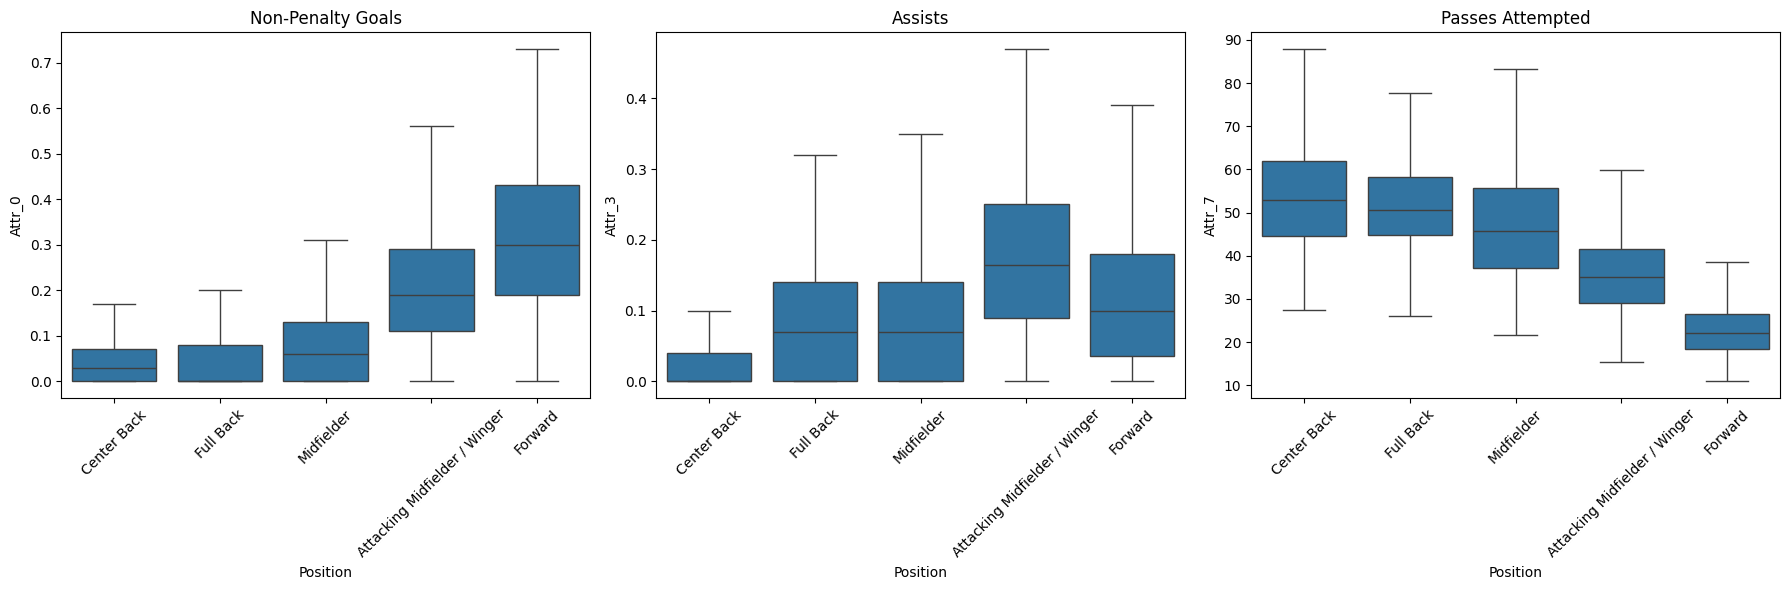

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat dataframe tanpa pemain posisi 'Goalkeeper'
df_nongk = df_all[df_all['Position'] != 'Goalkeeper']

# Ubah ukuran grafik
plt.figure(figsize=(18, 6))

# Buat list nama kolom dan judul untuk masing-masing plot
cols = ['Attr_0', 'Attr_3', 'Attr_7']
titles = ['Non-Penalty Goals', 'Assists', 'Passes Attempted']

# Loop untuk membuat 3 boxplot
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Position', y=col, data=df_nongk, showfliers=False)
    plt.title(titles[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


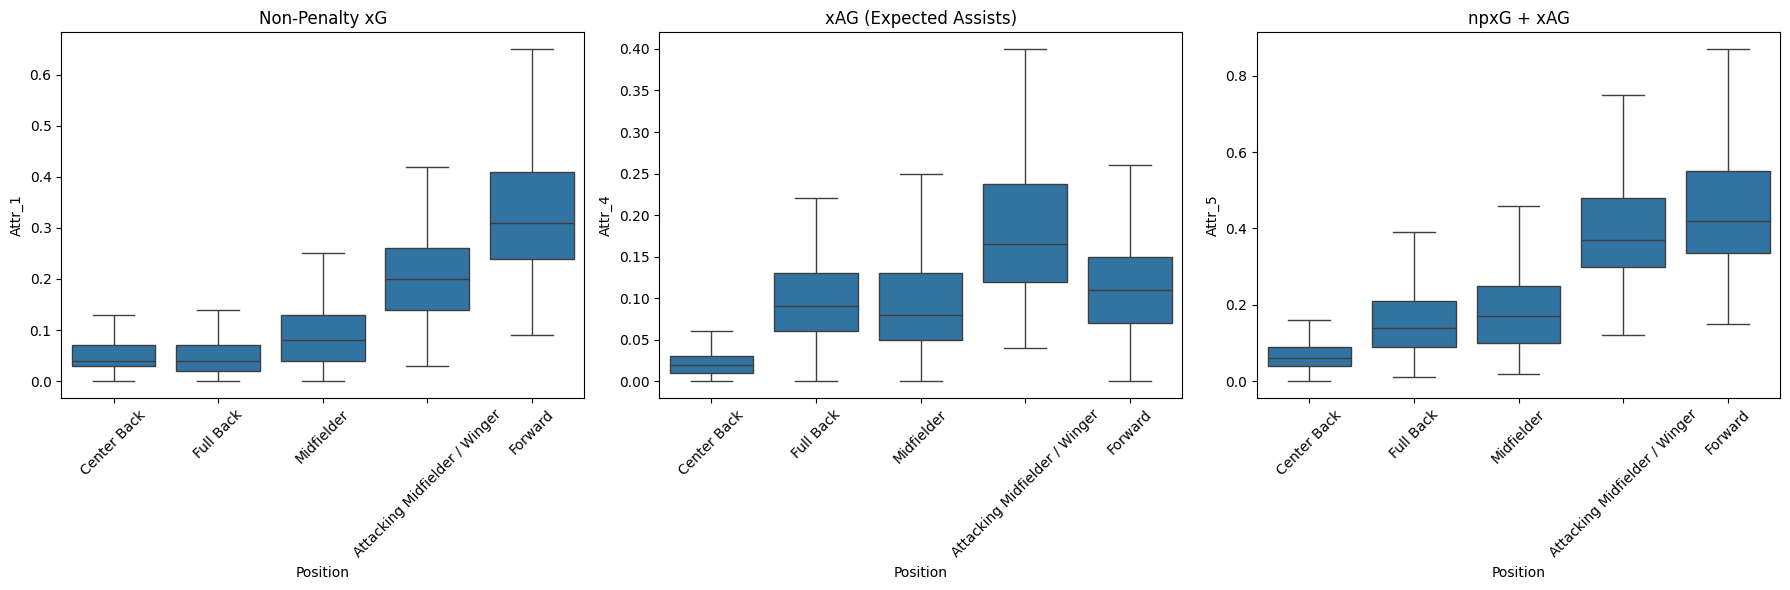

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat dataframe tanpa pemain posisi 'Goalkeeper'
df_nongk = df_all[df_all['Position'] != 'Goalkeeper']

# Ukuran gambar
plt.figure(figsize=(18, 6))

# Daftar kolom dan judul
cols = ['Attr_1', 'Attr_4', 'Attr_5']
titles = ['Non-Penalty xG', 'xAG (Expected Assists)', 'npxG + xAG']

# Loop untuk membuat boxplot
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Position', y=col, data=df_nongk, showfliers=False)
    plt.title(titles[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


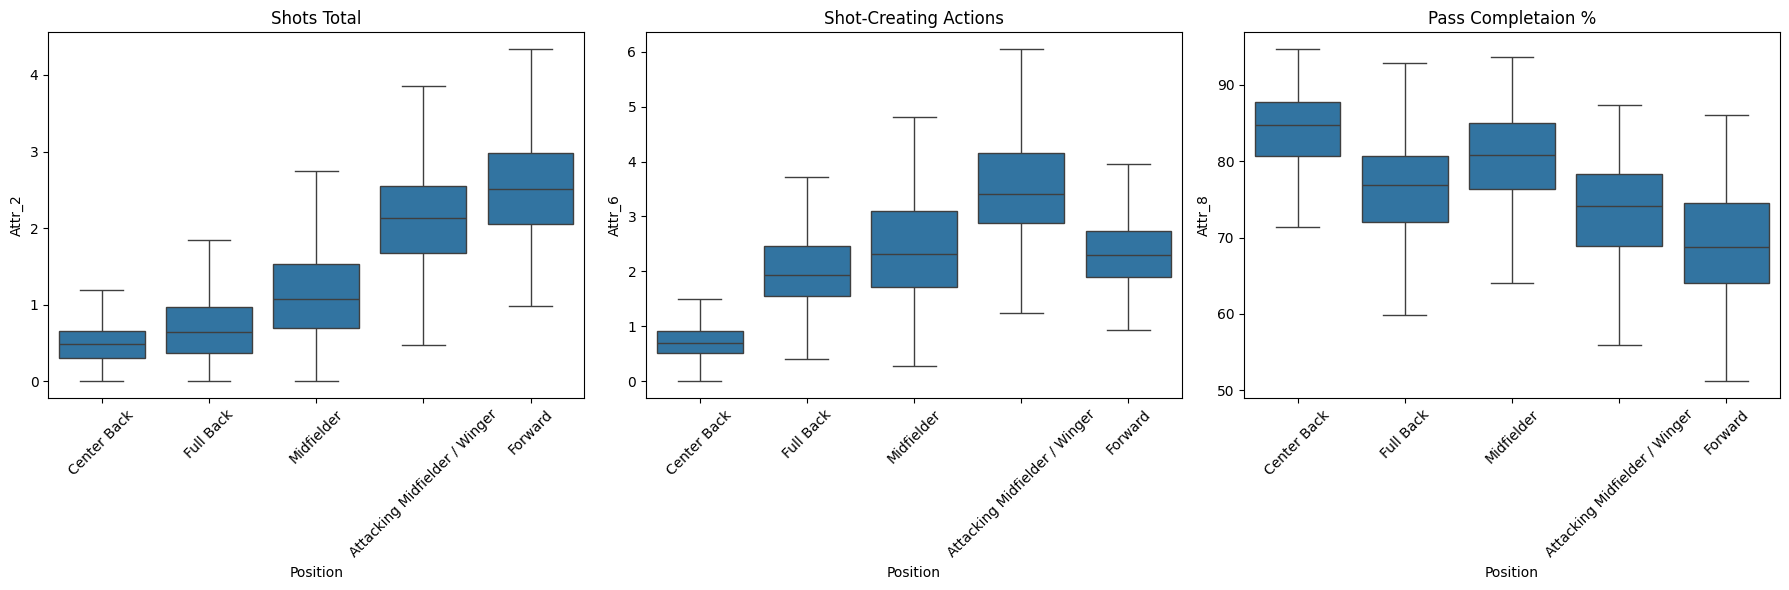

In [ ]:
# Buat dataframe tanpa pemain posisi 'Goalkeeper'
df_nongk = df_all[df_all['Position'] != 'Goalkeeper']

# Ukuran gambar
plt.figure(figsize=(18, 6))

# Daftar kolom dan judul
cols = ['Attr_2', 'Attr_6', 'Attr_8']
titles = ['Shots Total', 'Shot-Creating Actions', 'Pass Completaion %']

# Loop untuk membuat boxplot
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Position', y=col, data=df_nongk, showfliers=False)
    plt.title(titles[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

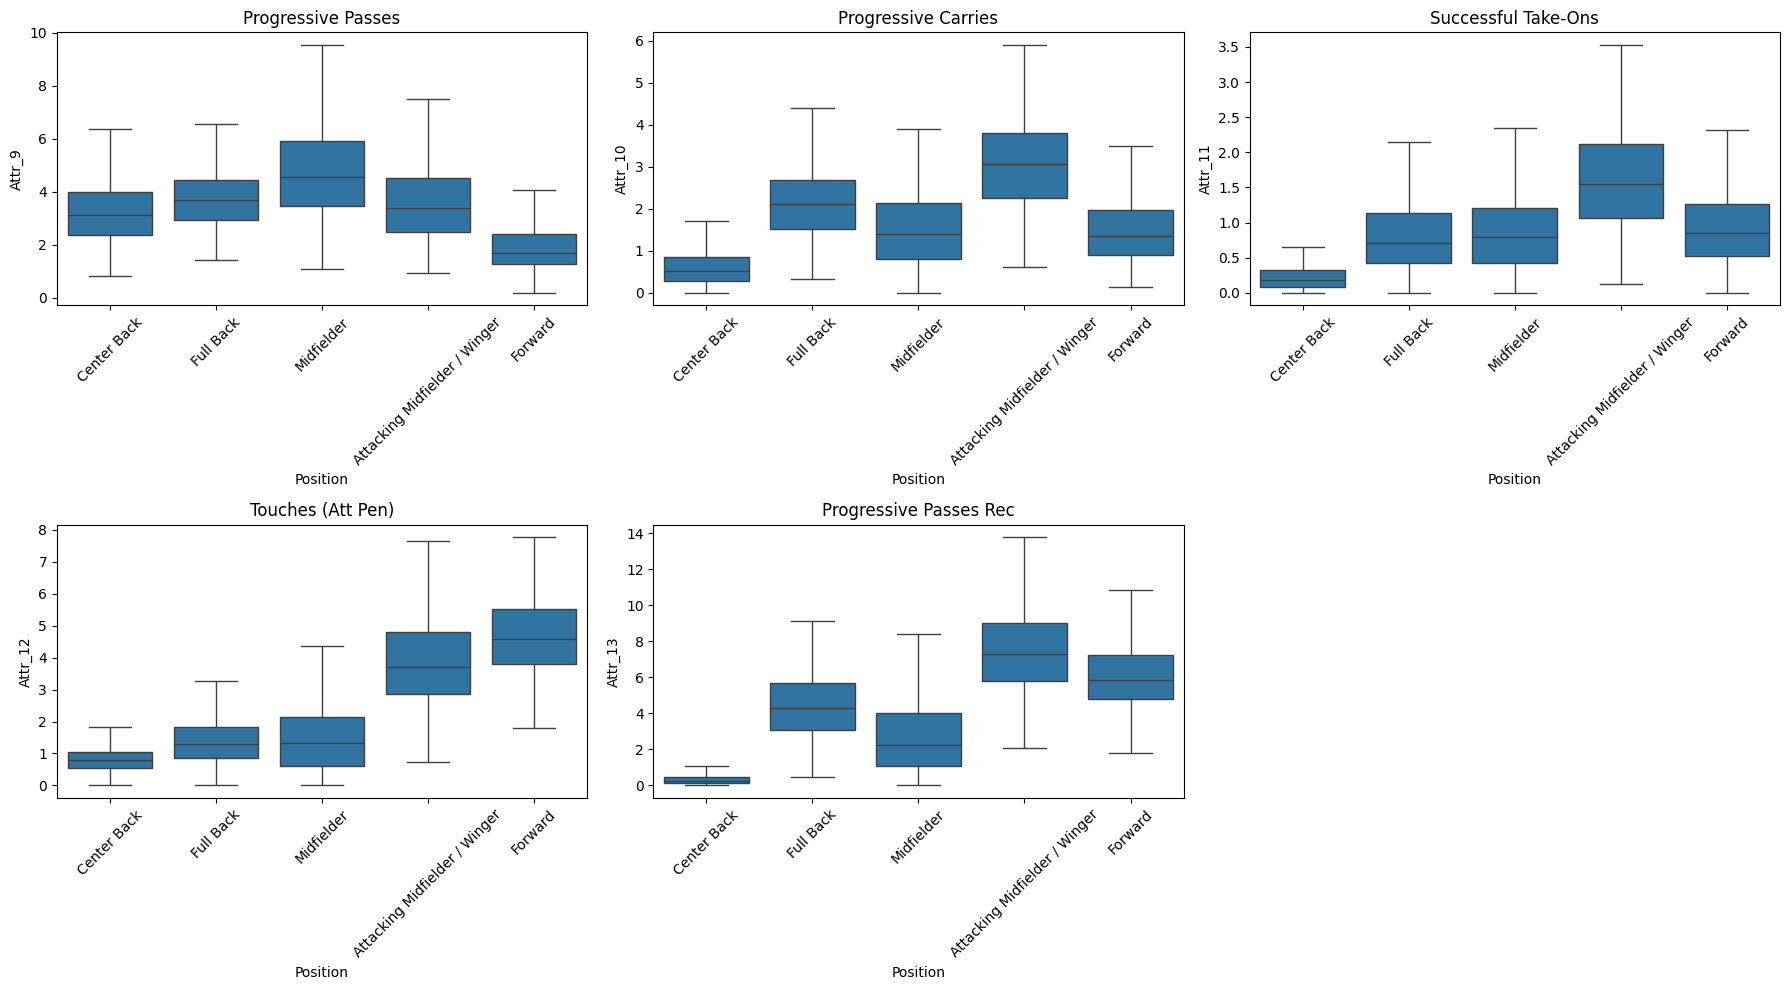

In [ ]:
# Ukuran gambar
plt.figure(figsize=(18, 10))

# Daftar kolom dan judul
cols = ['Attr_9', 'Attr_10', 'Attr_11', 'Attr_12', 'Attr_13']
titles = ['Progressive Passes', 'Progressive Carries', 'Successful Take-Ons', 'Touches (Att Pen)', 'Progressive Passes Rec']

# Loop untuk membuat boxplot
for i, col in enumerate(cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Position', y=col, data=df_nongk, showfliers=False)
    plt.title(titles[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

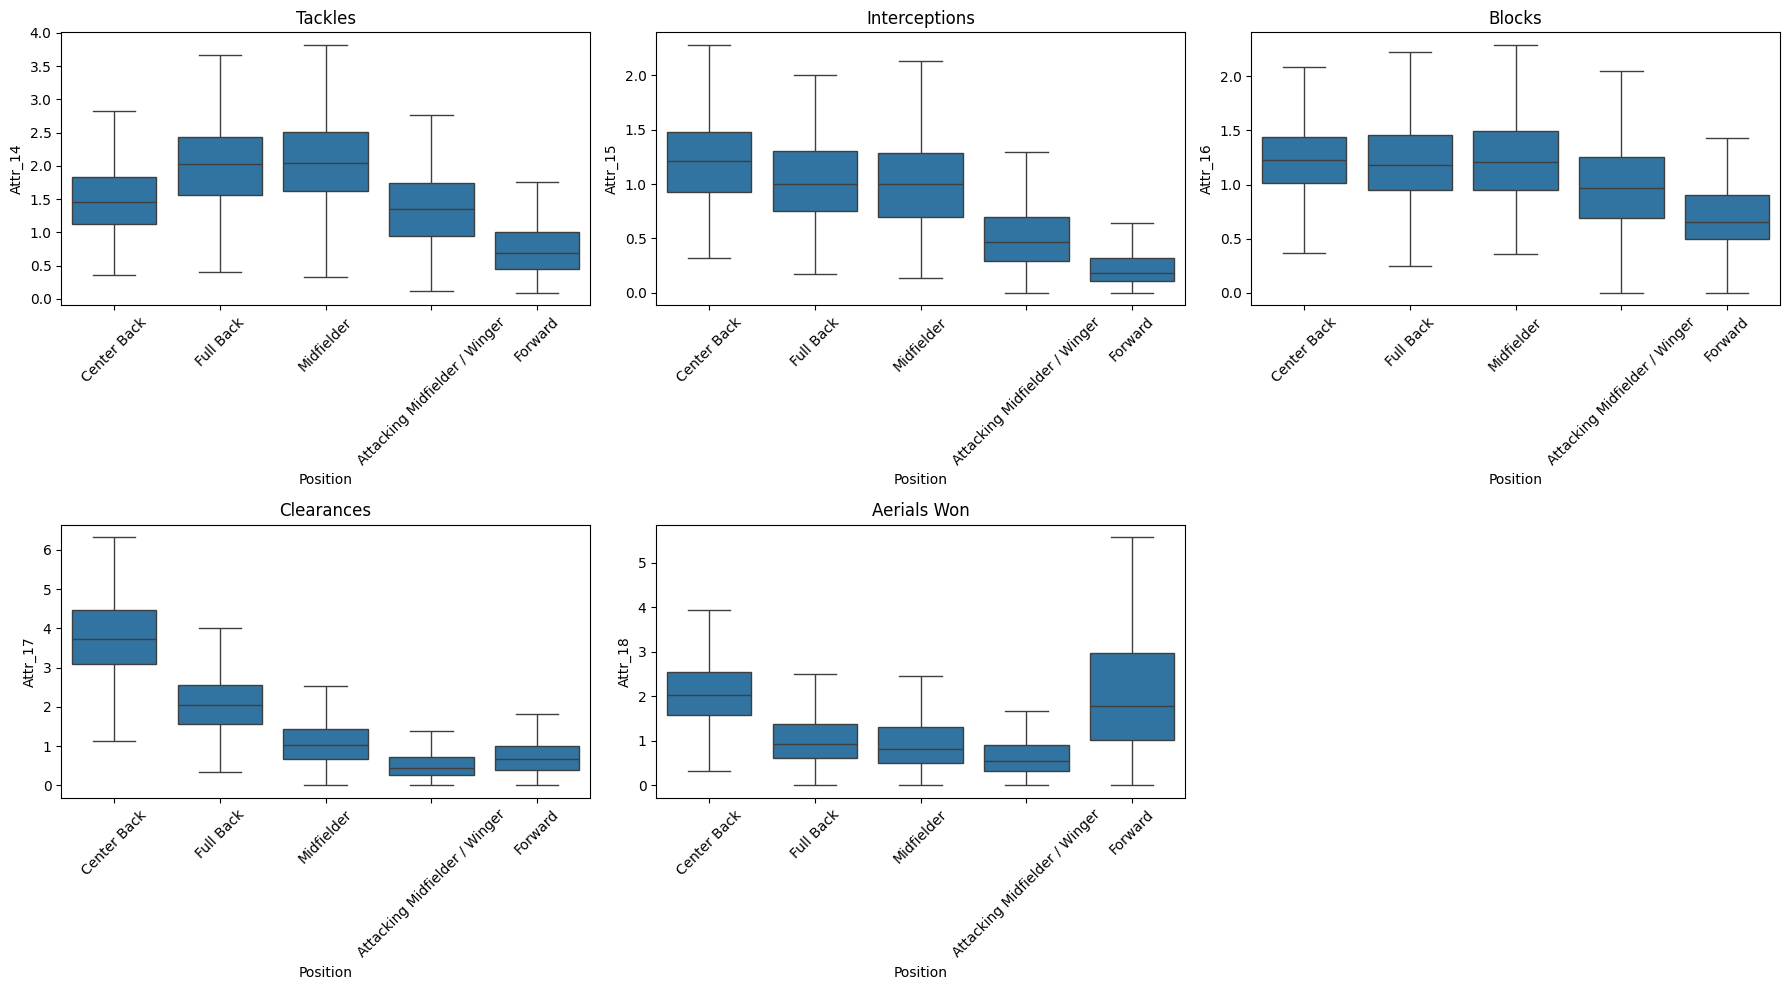

In [ ]:
# Ukuran gambar
plt.figure(figsize=(18, 10))

# Daftar kolom dan judul
cols = ['Attr_14', 'Attr_15', 'Attr_16', 'Attr_17', 'Attr_18']
titles = ['Tackles', 'Interceptions', 'Blocks', 'Clearances', 'Aerials Won']

# Loop untuk membuat boxplot
for i, col in enumerate(cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Position', y=col, data=df_nongk, showfliers=False)
    plt.title(titles[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

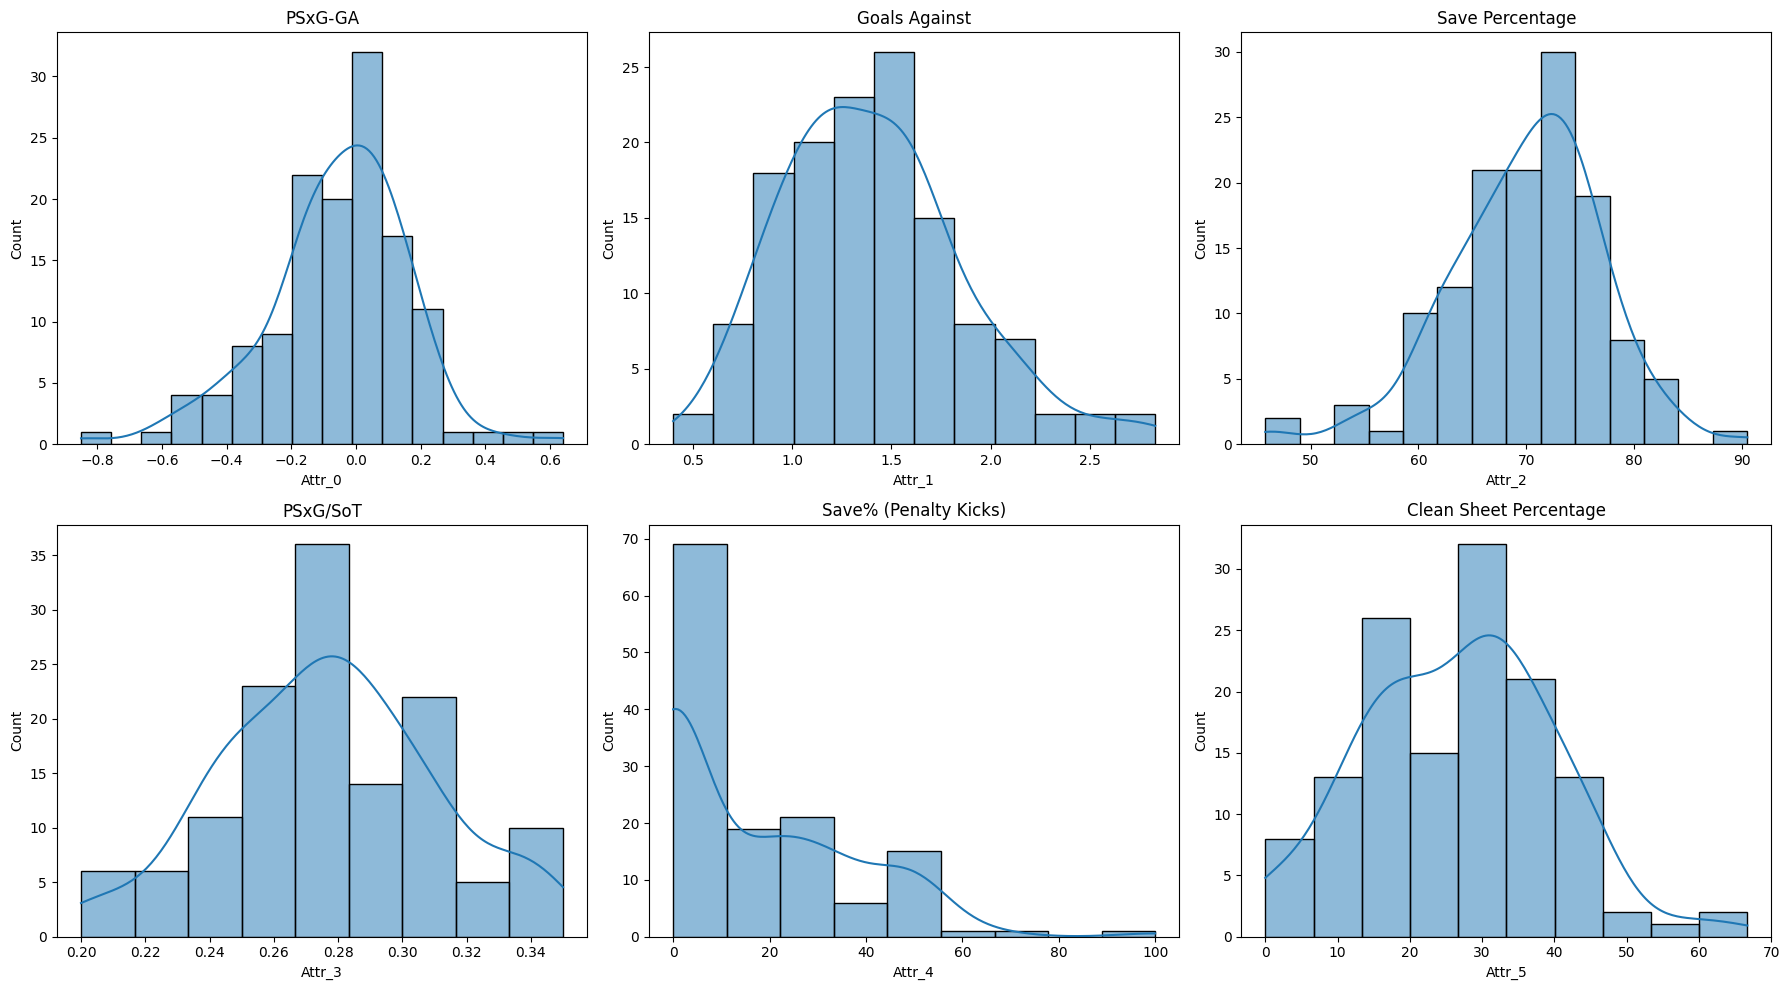

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

gk_columns = [
    'Attr_0',  # PSxG-GA
    'Attr_1',  # Goals Against
    'Attr_2',  # Save Percentage
    'Attr_3',  # PSxG/SoT
    'Attr_4',  # Save% (Penalty Kicks)
    'Attr_5',  # Clean Sheet Percentage
    'Attr_6',  # Touches
    'Attr_7',  # Launch %
    'Attr_8',  # Goal Kicks
    'Attr_9',  # Avg. Length of Goal Kicks
    'Attr_10', # Crosses Stopped %
    'Attr_11', # Def. Actions Outside Pen. Area
    'Attr_12'  # Avg. Distance of Def. Actions
]


# Filter data GK
df_gk = df_all[df_all['Position'] == 'Goalkeeper']

# Plot distribusi 6 atribut pertama dulu
plt.figure(figsize=(18, 10))
titles = [
    'PSxG-GA', 'Goals Against', 'Save Percentage', 'PSxG/SoT',
    'Save% (Penalty Kicks)', 'Clean Sheet Percentage'
]

for i in range(6):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_gk[gk_columns[i]], kde=True)
    plt.title(titles[i])

plt.tight_layout()
plt.show()


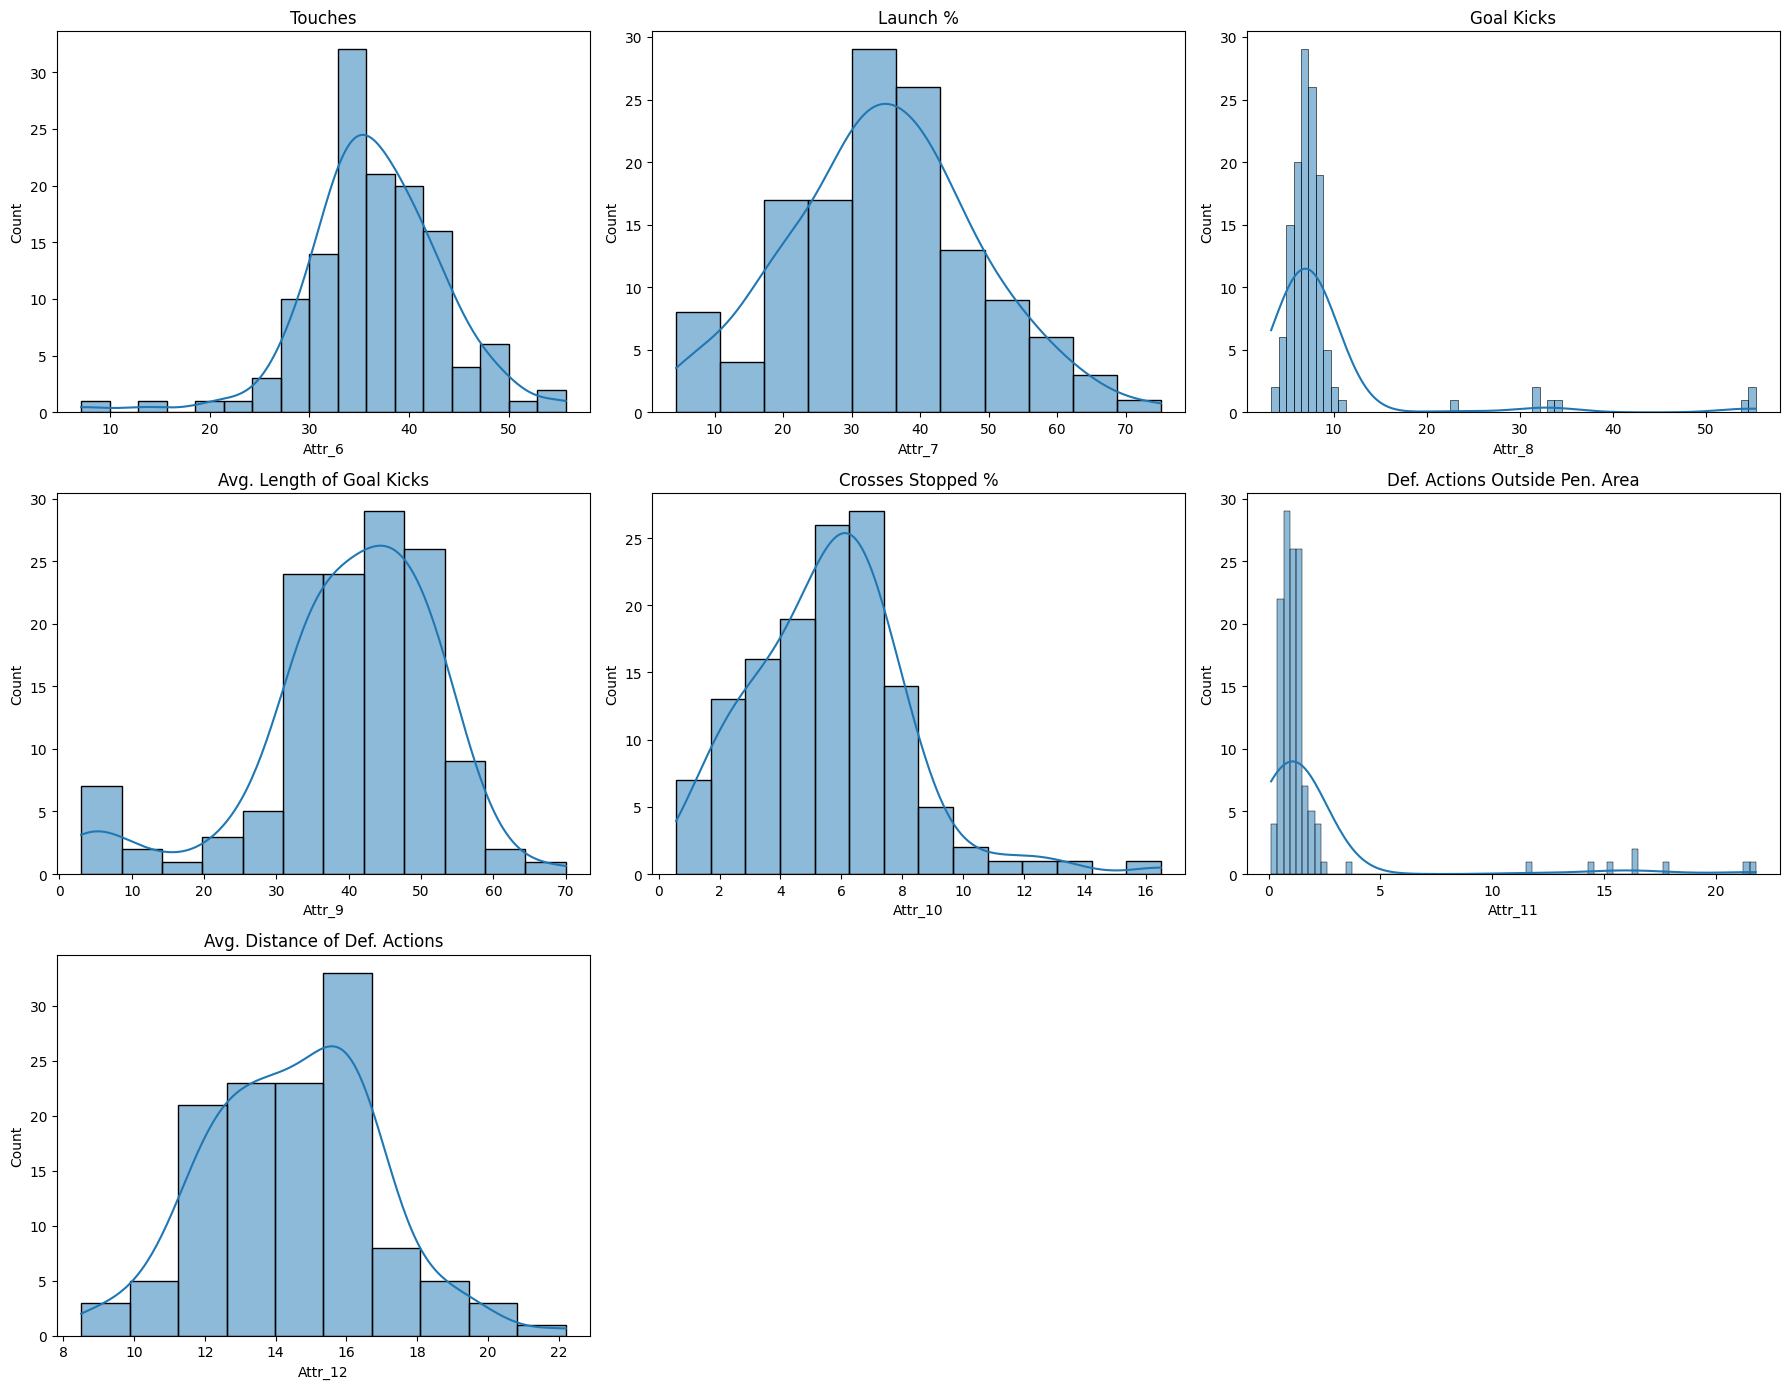

In [ ]:
plt.figure(figsize=(18, 14))
titles = [
    'Touches', 'Launch %', 'Goal Kicks', 'Avg. Length of Goal Kicks',
    'Crosses Stopped %', 'Def. Actions Outside Pen. Area', 'Avg. Distance of Def. Actions'
]

for i in range(7):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_gk[gk_columns[6+i]], kde=True)
    plt.title(titles[i])

plt.tight_layout()
plt.show()

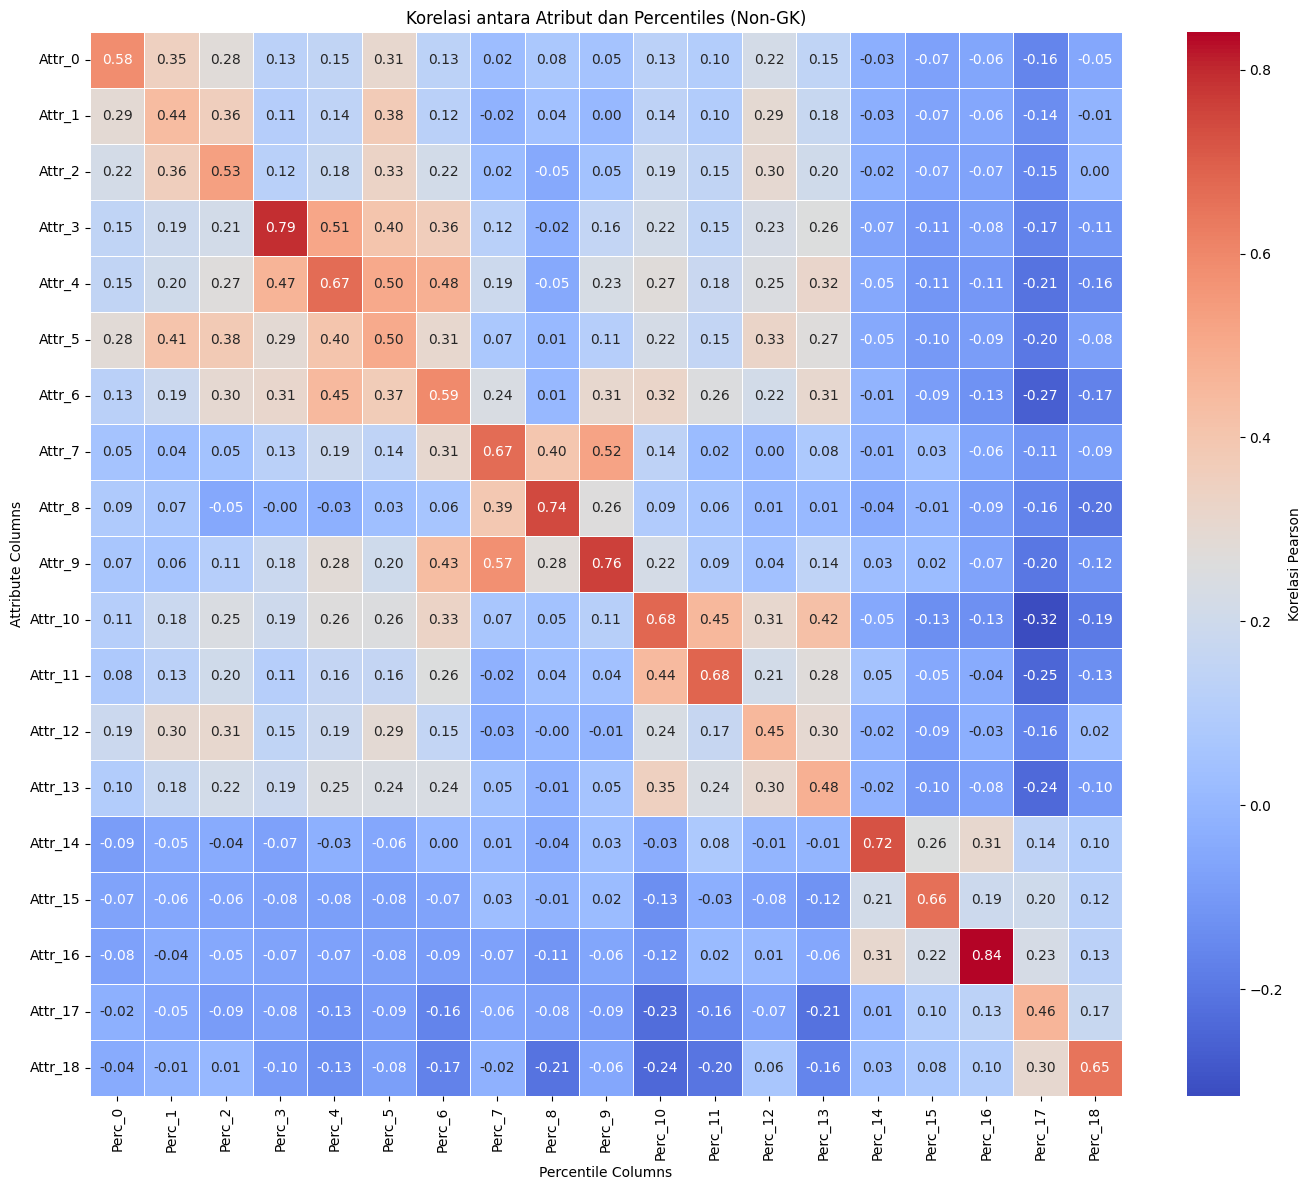

In [ ]:
# KOLERASI ANTARA ATTRIBUTE DAN PERCENTILE DATA PEMAIN

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter hanya pemain non-gk
df_nongk = df_all[df_all['Position'] != 'Goalkeeper']

# list kolom atribut dan percentiles
cols_attr = [f'Attr_{i}' for i in range(19)]
cols_perc = [f'Perc_{i}' for i in range(19)]

# Ambil subset data yang hanya berisi attr dan perc
corr_df = df_nongk[cols_attr + cols_perc]

# Hitung matriks korelasi antara ATTR dan PERC (19x19)
corr_matrix = corr_df.corr().loc[cols_attr, cols_perc]

# Visualisasikan dengan heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Korelasi Pearson'})
plt.title("Korelasi antara Atribut dan Percentiles (Non-GK)")
plt.xlabel("Percentile Columns")
plt.ylabel("Attribute Columns")
plt.tight_layout()
plt.show()


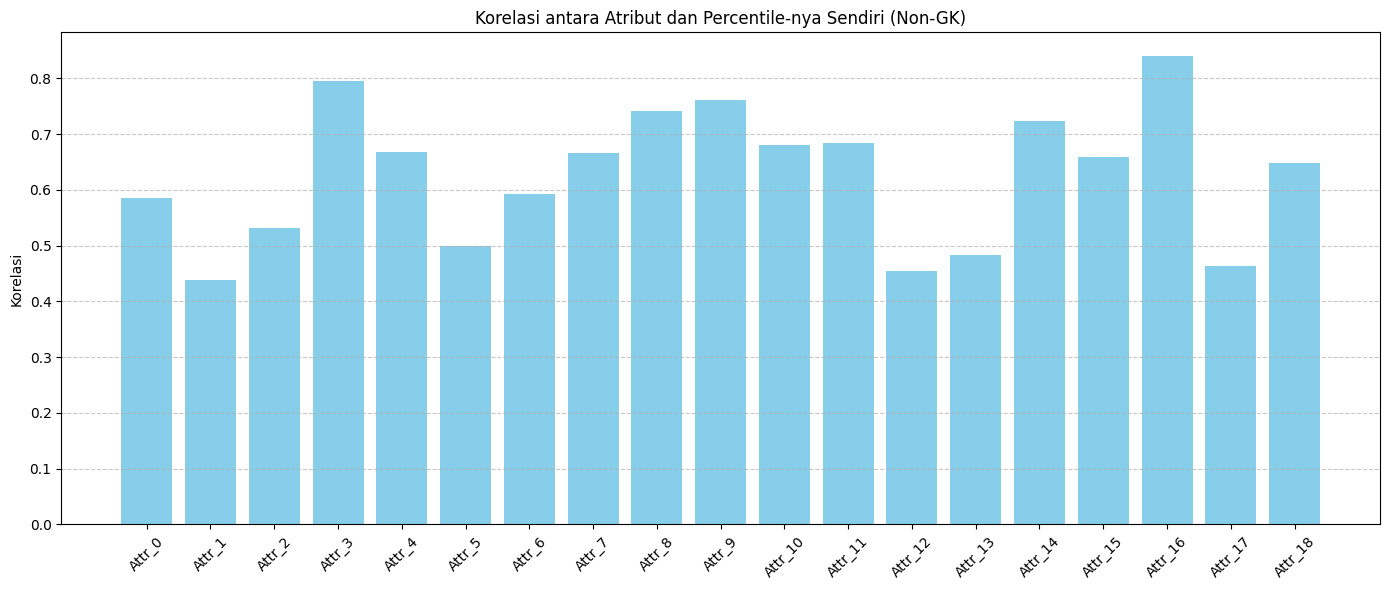

In [ ]:
import matplotlib.pyplot as plt

# Hitung korelasi antara setiap atribut dan percentile-nya sendiri
corr_values = []
for i in range(19):
    attr_col = f'Attr_{i}'
    perc_col = f'Perc_{i}'
    corr = df_nongk[attr_col].corr(df_nongk[perc_col])
    corr_values.append(corr)

# Plot bar chart
plt.figure(figsize=(14, 6))
plt.bar(range(19), corr_values, color='skyblue')
plt.xticks(range(19), [f'Attr_{i}' for i in range(19)], rotation=45)
plt.ylabel('Korelasi')
plt.title('Korelasi antara Atribut dan Percentile-nya Sendiri (Non-GK)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


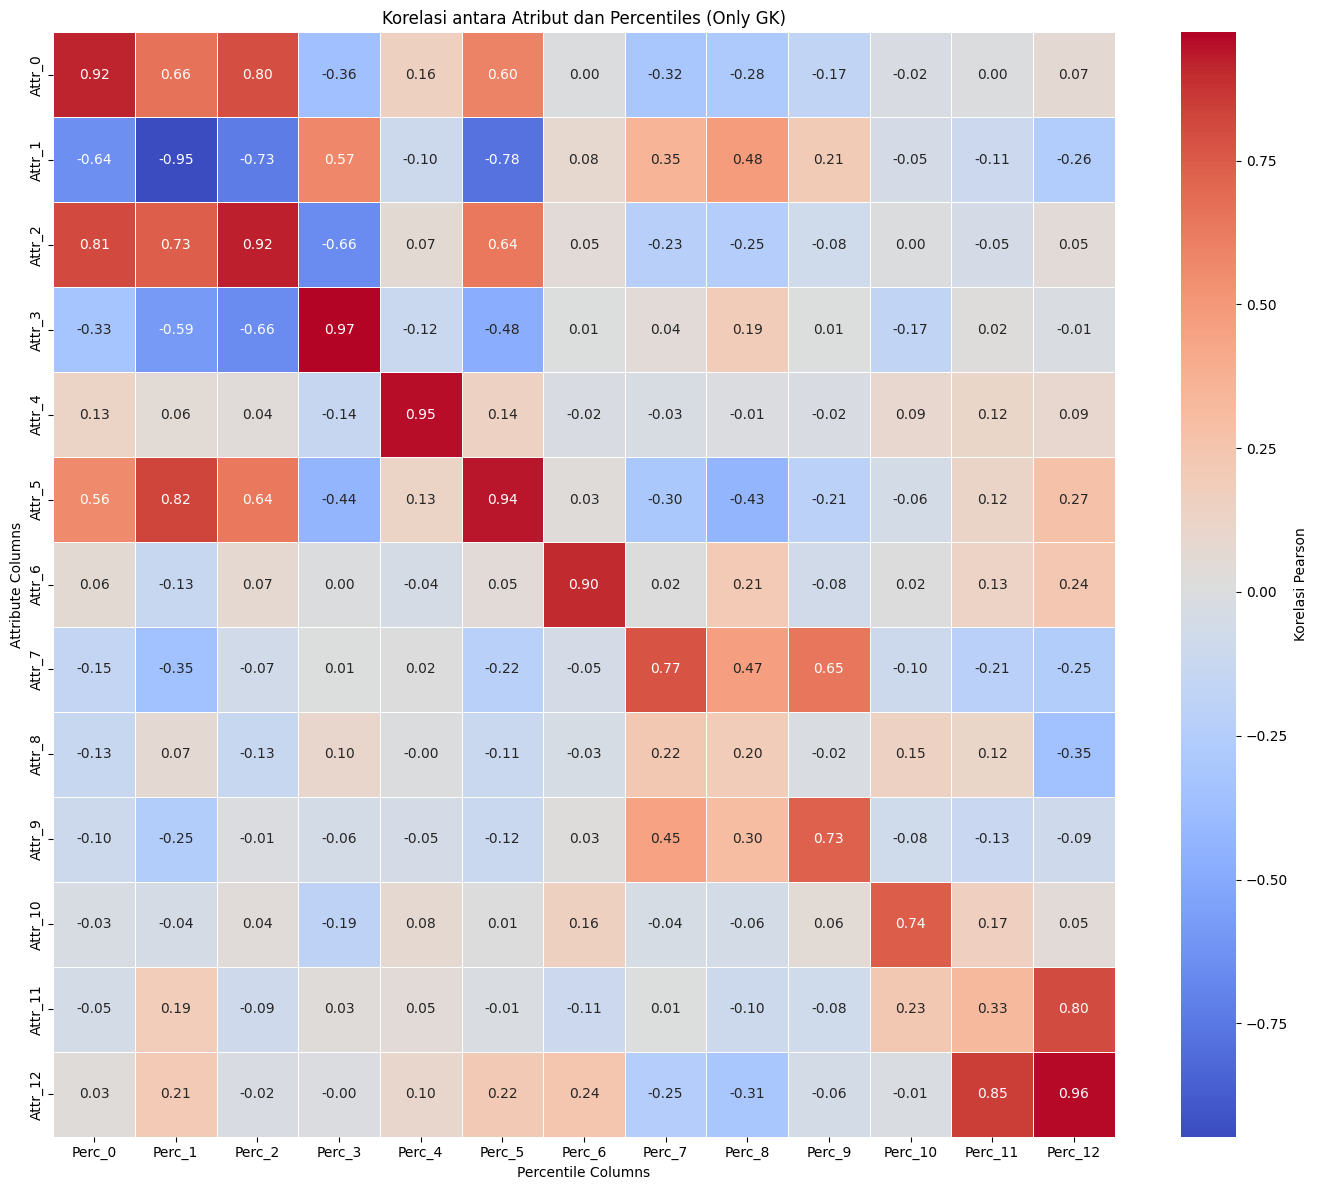

In [ ]:
# KOLERASI ANTARA ATTRIBUTE DAN PERCENTILE DATA PEMAIN (GK)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter hanya pemain gk
df_gk = df_all[df_all['Position'] == 'Goalkeeper']

# list kolom atribut dan percentiles
cols_attrgk = [f'Attr_{i}' for i in range(13)]
cols_percgk = [f'Perc_{i}' for i in range(13)]

# Ambil subset data yang hanya berisi attr dan perc
corr_dfgk = df_gk[cols_attrgk + cols_percgk]

# Hitung matriks korelasi antara ATTR dan PERC (19x19)
corr_matrixgk = corr_dfgk.corr().loc[cols_attrgk, cols_percgk]

# Visualisasikan dengan heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrixgk, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Korelasi Pearson'})
plt.title("Korelasi antara Atribut dan Percentiles (Only GK)")
plt.xlabel("Percentile Columns")
plt.ylabel("Attribute Columns")
plt.tight_layout()
plt.show()


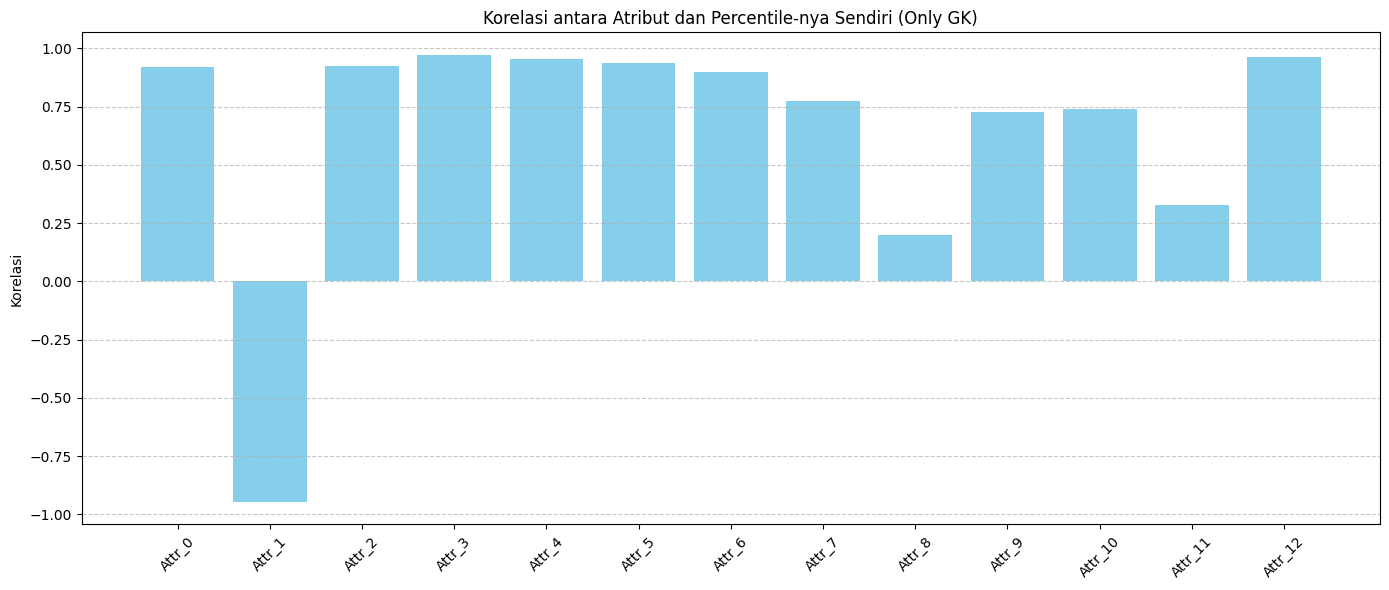

In [ ]:
import matplotlib.pyplot as plt

# Hitung korelasi antara setiap atribut dan percentile-nya sendiri
corr_valuesgk = []
for i in range(13):
    attr_colgk = f'Attr_{i}'
    perc_colgk = f'Perc_{i}'
    corrgk = df_gk[attr_colgk].corr(df_gk[perc_colgk])
    corr_valuesgk.append(corrgk)

# Plot bar chart
plt.figure(figsize=(14, 6))
plt.bar(range(13), corr_valuesgk, color='skyblue')
plt.xticks(range(13), [f'Attr_{i}' for i in range(13)], rotation=45)
plt.ylabel('Korelasi')
plt.title('Korelasi antara Atribut dan Percentile-nya Sendiri (Only GK)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


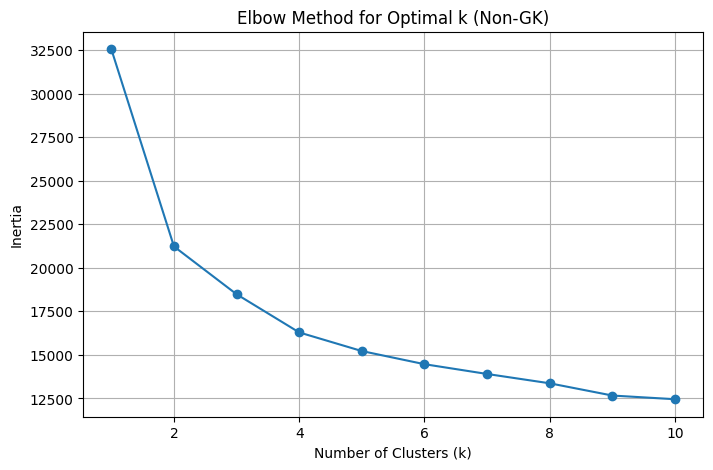

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Filter hanya pemain non-gk
df_nongk = df_all[df_all['Position'] != 'Goalkeeper']

# Ambil kolom atribut Non-GK
attr_cols_nongk = [f'Attr_{i}' for i in range(19)]
X_nongk = df_nongk[attr_cols_nongk].copy()

# Normalisasi
scaler = StandardScaler()
X_scaled_nongk = scaler.fit_transform(X_nongk)

# Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled_nongk)
    inertia.append(km.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (Non-GK)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

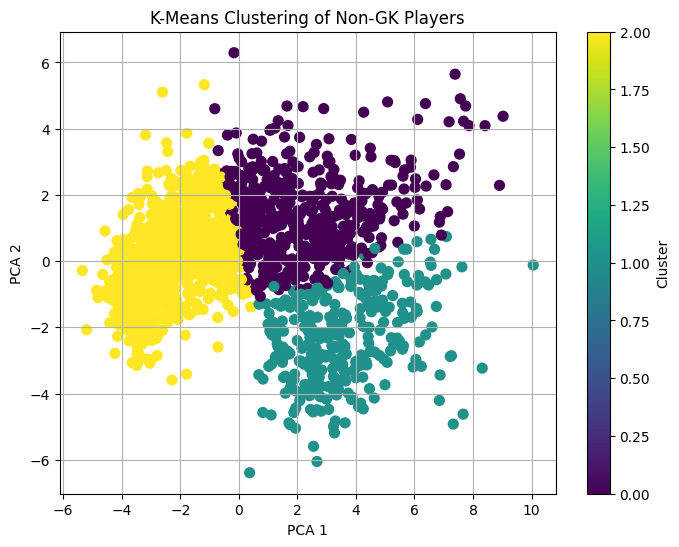

In [ ]:
from sklearn.decomposition import PCA

# 3 cluster
kmeans_nongk = KMeans(n_clusters=3, random_state=42)
clusters_nongk = kmeans_nongk.fit_predict(X_scaled_nongk)

# Tambahkan ke DataFrame
df_nongk = df_nongk.copy()  # pastikan ini salinan baru
df_nongk['Cluster'] = clusters_nongk

# Reduksi ke 2 dimensi
pca = PCA(n_components=2)
X_pca_nongk = pca.fit_transform(X_scaled_nongk)

# Plot klaster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_nongk[:, 0], X_pca_nongk[:, 1], c=clusters_nongk, cmap='viridis', s=50)
plt.title('K-Means Clustering of Non-GK Players')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [ ]:
# Rata-rata atribut per klaster
df_nongk.groupby('Cluster')[attr_cols_nongk].mean()

Attr_0    Attr_1    Attr_2    Attr_3    Attr_4    Attr_5    Attr_6  \
Cluster                                                                         
0        0.151967  0.156311  1.750430  0.172664  0.177008  0.333422  3.467275   
1        0.323803  0.331902  2.542590  0.120623  0.119967  0.451180  2.448197   
2        0.042326  0.052272  0.647109  0.042902  0.051326  0.103478  1.441326   

            Attr_7     Attr_8    Attr_9   Attr_10   Attr_11   Attr_12  \
Cluster                                                                 
0        43.985533  75.676434  4.344570  3.013033  1.556086  3.054119   
1        23.789016  69.079016  2.005607  1.683574  1.005672  4.629770   
2        51.180902  80.920217  3.866685  1.119935  0.517337  0.978196   

          Attr_13   Attr_14   Attr_15   Attr_16   Attr_17   Attr_18  
Cluster                                                              
0        6.532807  1.673914  0.677787  1.075799  0.776721  0.694590  
1        6.313082  0.830951  0.261475  0.732885  0.711311  2.044689  
2        1.771793  1.920696  1.188000  1.271804  2.551065  1.525674

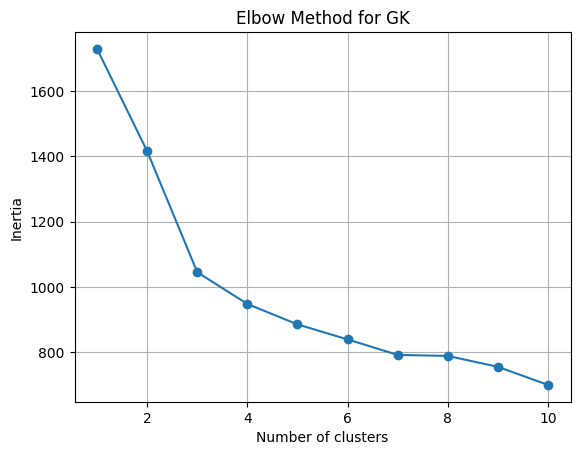

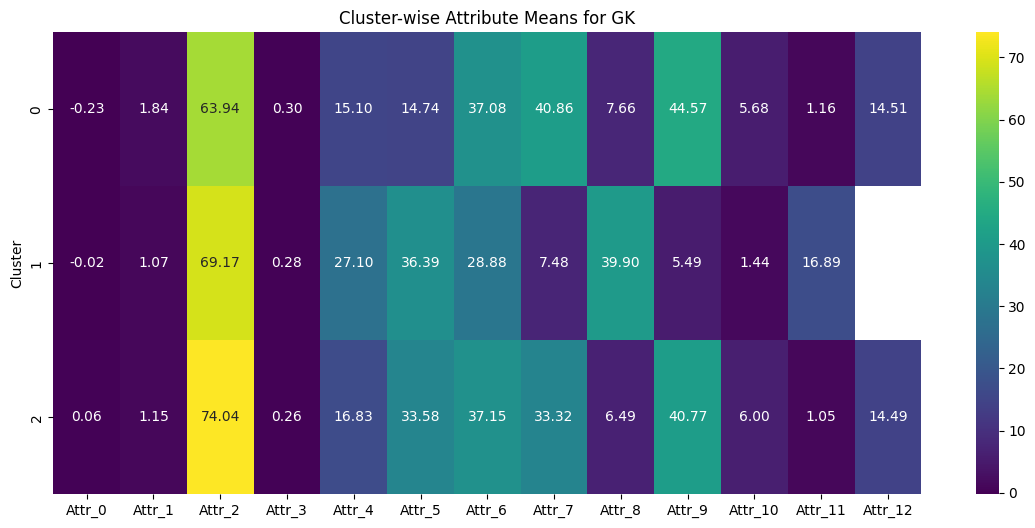

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Ambil kolom atribut GK
df_gk = df_all[df_all['Position'] == 'Goalkeeper'].copy()
attribute_gk_columns = [f'Attr_{i}' for i in range(13)]
X_gk = df_gk[attribute_gk_columns].copy()
col_means = X_gk.mean()
col_means_filled = col_means.fillna(0)
X_gk = X_gk.fillna(col_means_filled)


# Standardisasi
scaler = StandardScaler()
X_scaled_gk = scaler.fit_transform(X_gk)

# Elbow Method
inertia_gk = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_gk)
    inertia_gk.append(kmeans.inertia_)

# Visualisasi Elbow
plt.plot(range(1, 11), inertia_gk, marker='o')
plt.title('Elbow Method for GK')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# K-Means dengan jumlah cluster optimal (3)
kmeans_gk = KMeans(n_clusters=3, random_state=42)
clusters_gk = kmeans_gk.fit_predict(X_scaled_gk)
df_gk['Cluster'] = clusters_gk

# Visualisasi heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_summary_gk, annot=True, fmt=".2f", cmap='viridis')
plt.title('Cluster-wise Attribute Means for GK')
plt.show()


In [ ]:
df_gk.groupby('Cluster')[attribute_gk_columns].mean()

Attr_0    Attr_1     Attr_2  Attr_3     Attr_4     Attr_5  \
Cluster                                                                
0       -0.234000  1.838400  63.936000  0.2996  15.098000  14.740000   
1       -0.025000  1.068750  69.175000  0.2800  27.100000  36.387500   
2        0.057867  1.145867  74.042667  0.2612  16.826667  33.577333   

            Attr_6  Attr_7   Attr_8   Attr_9   Attr_10    Attr_11    Attr_12  
Cluster                                                                       
0        37.082800  40.864   7.6638  44.5700  5.676000   1.162800  14.510000  
1        28.875000   7.485  39.9000   5.4875  1.436250  16.887500        NaN  
2        37.152533  33.324   6.4868  40.7720  5.998667   1.045333  14.486667

In [ ]:
# Simpan ke CSV
X_gk.to_csv('cleaned_fbref_data_xgk.csv', index=False)

# Unduh ke lokal
from google.colab import files
files.download('cleaned_fbref_data_xgk.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

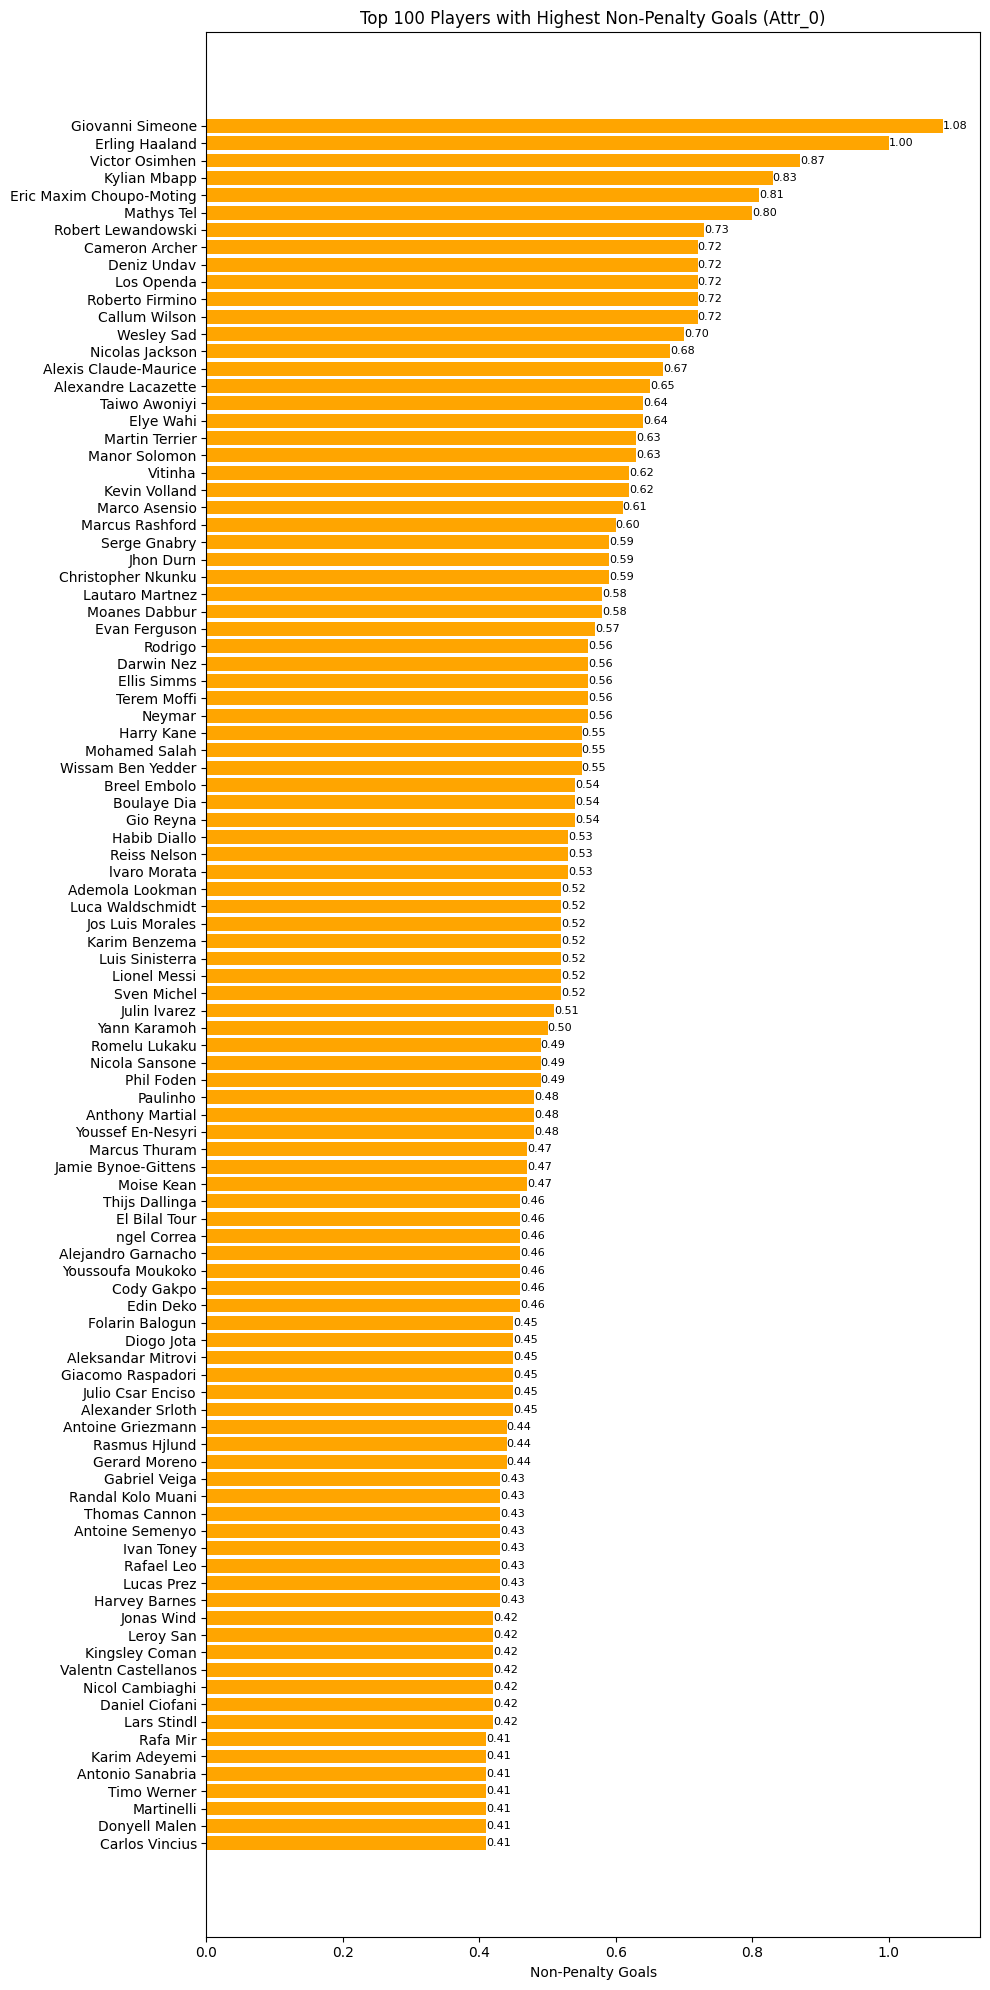

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Atur font agar kompatibel dengan karakter non-ASCII
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

# 1. Filter hanya pemain Non-GK
df_nongk = df_all[df_all['Position'] != 'Goalkeeper'].copy()

# 2. Urutkan berdasarkan Non-Penalty Goals (Attr_0)
top_goalscorers = df_nongk[['Name', 'Attr_0']].sort_values(by='Attr_0', ascending=False).head(100)

# (Opsional) Bersihkan nama pemain dari karakter non-ASCII jika error font tetap muncul
top_goalscorers['Name'] = top_goalscorers['Name'].apply(lambda x: x.encode('ascii', errors='ignore').decode())

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 20))
bars = plt.barh(top_goalscorers['Name'], top_goalscorers['Attr_0'], color='orange')

# Tambahkan label nilai goal di ujung bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=8)

# Judul dan label
plt.xlabel('Non-Penalty Goals')
plt.title('Top 100 Players with Highest Non-Penalty Goals')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


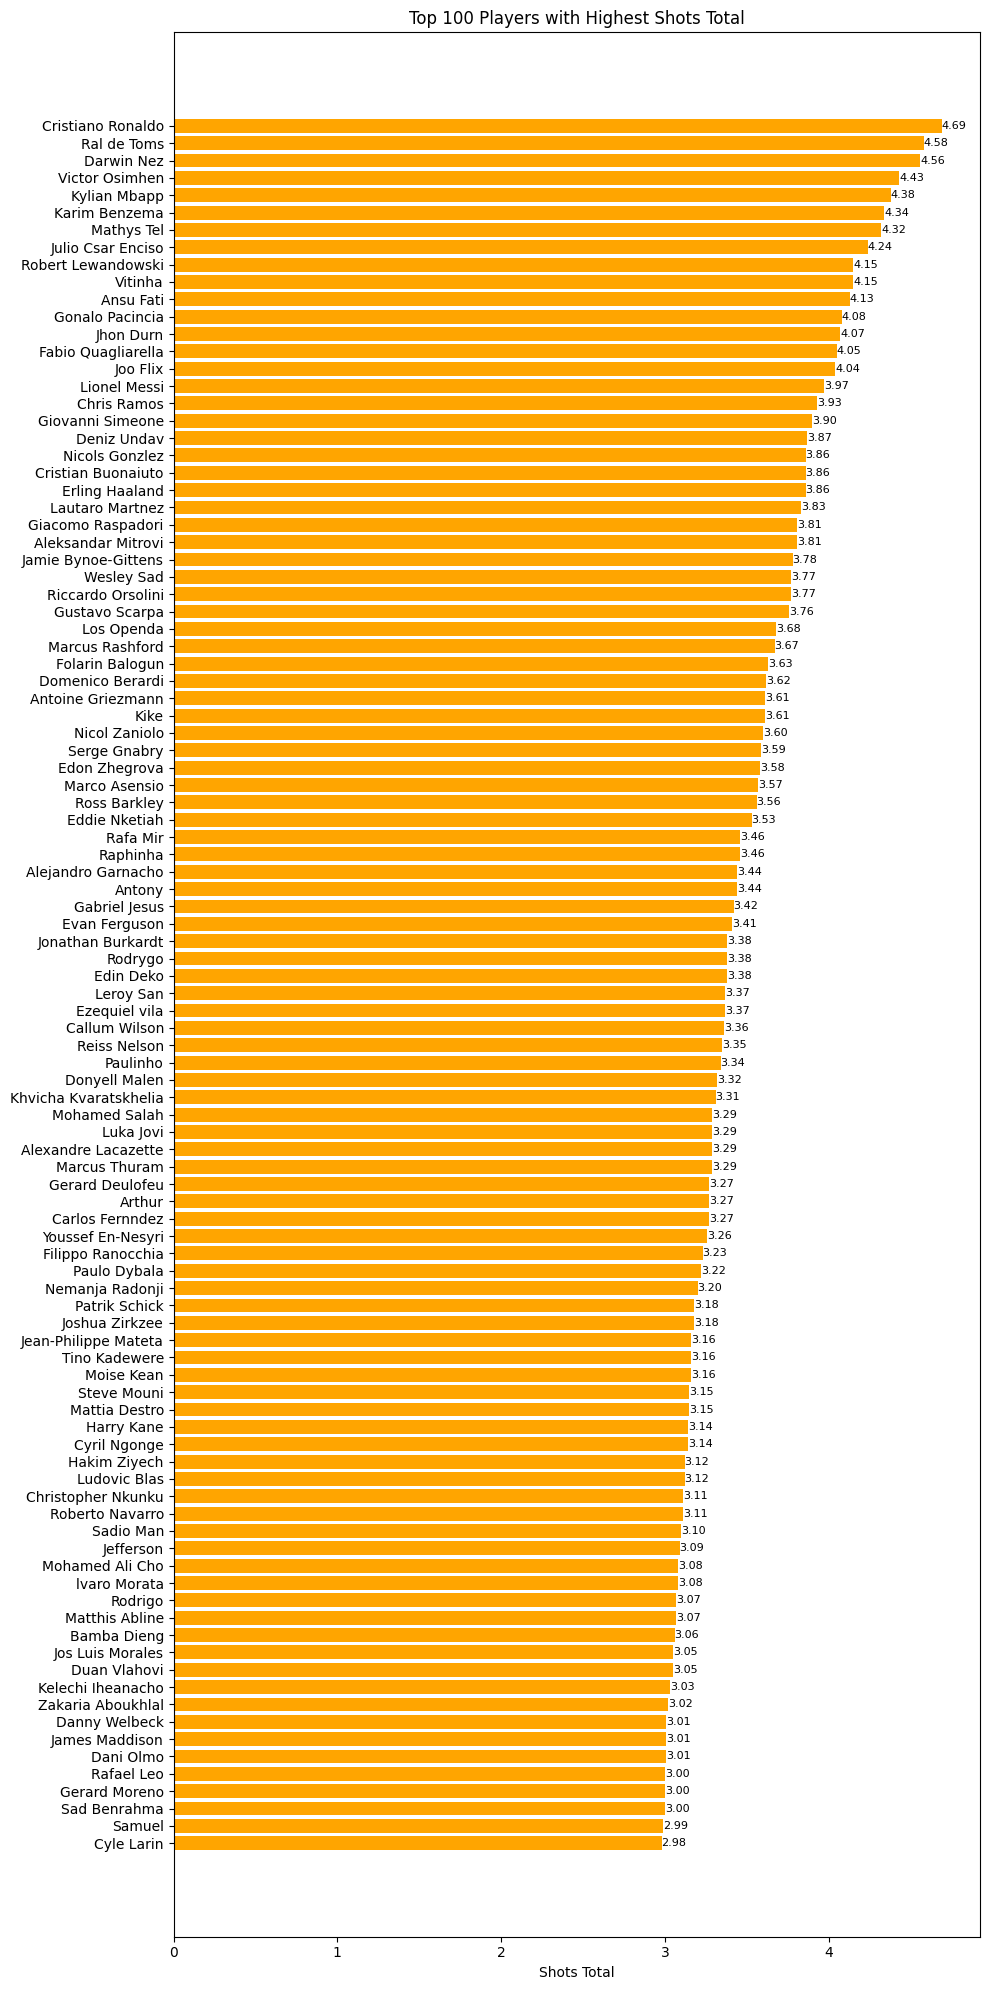

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Atur font agar kompatibel dengan karakter non-ASCII
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

# 1. Filter hanya pemain Non-GK
df_nongk = df_all[df_all['Position'] != 'Goalkeeper'].copy()

# 2. Urutkan berdasarkan Non-Penalty Goals (Attr_2)
top_shot = df_nongk[['Name', 'Attr_2']].sort_values(by='Attr_2', ascending=False).head(100)

# (Opsional) Bersihkan nama pemain dari karakter non-ASCII jika error font tetap muncul
top_shot['Name'] = top_shot['Name'].apply(lambda x: x.encode('ascii', errors='ignore').decode())

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 20))
bars = plt.barh(top_shot['Name'], top_shot['Attr_2'], color='orange')

# Tambahkan label nilai goal di ujung bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=8)

# Judul dan label
plt.xlabel('Shots Total')
plt.title('Top 100 Players with Highest Shots Total')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


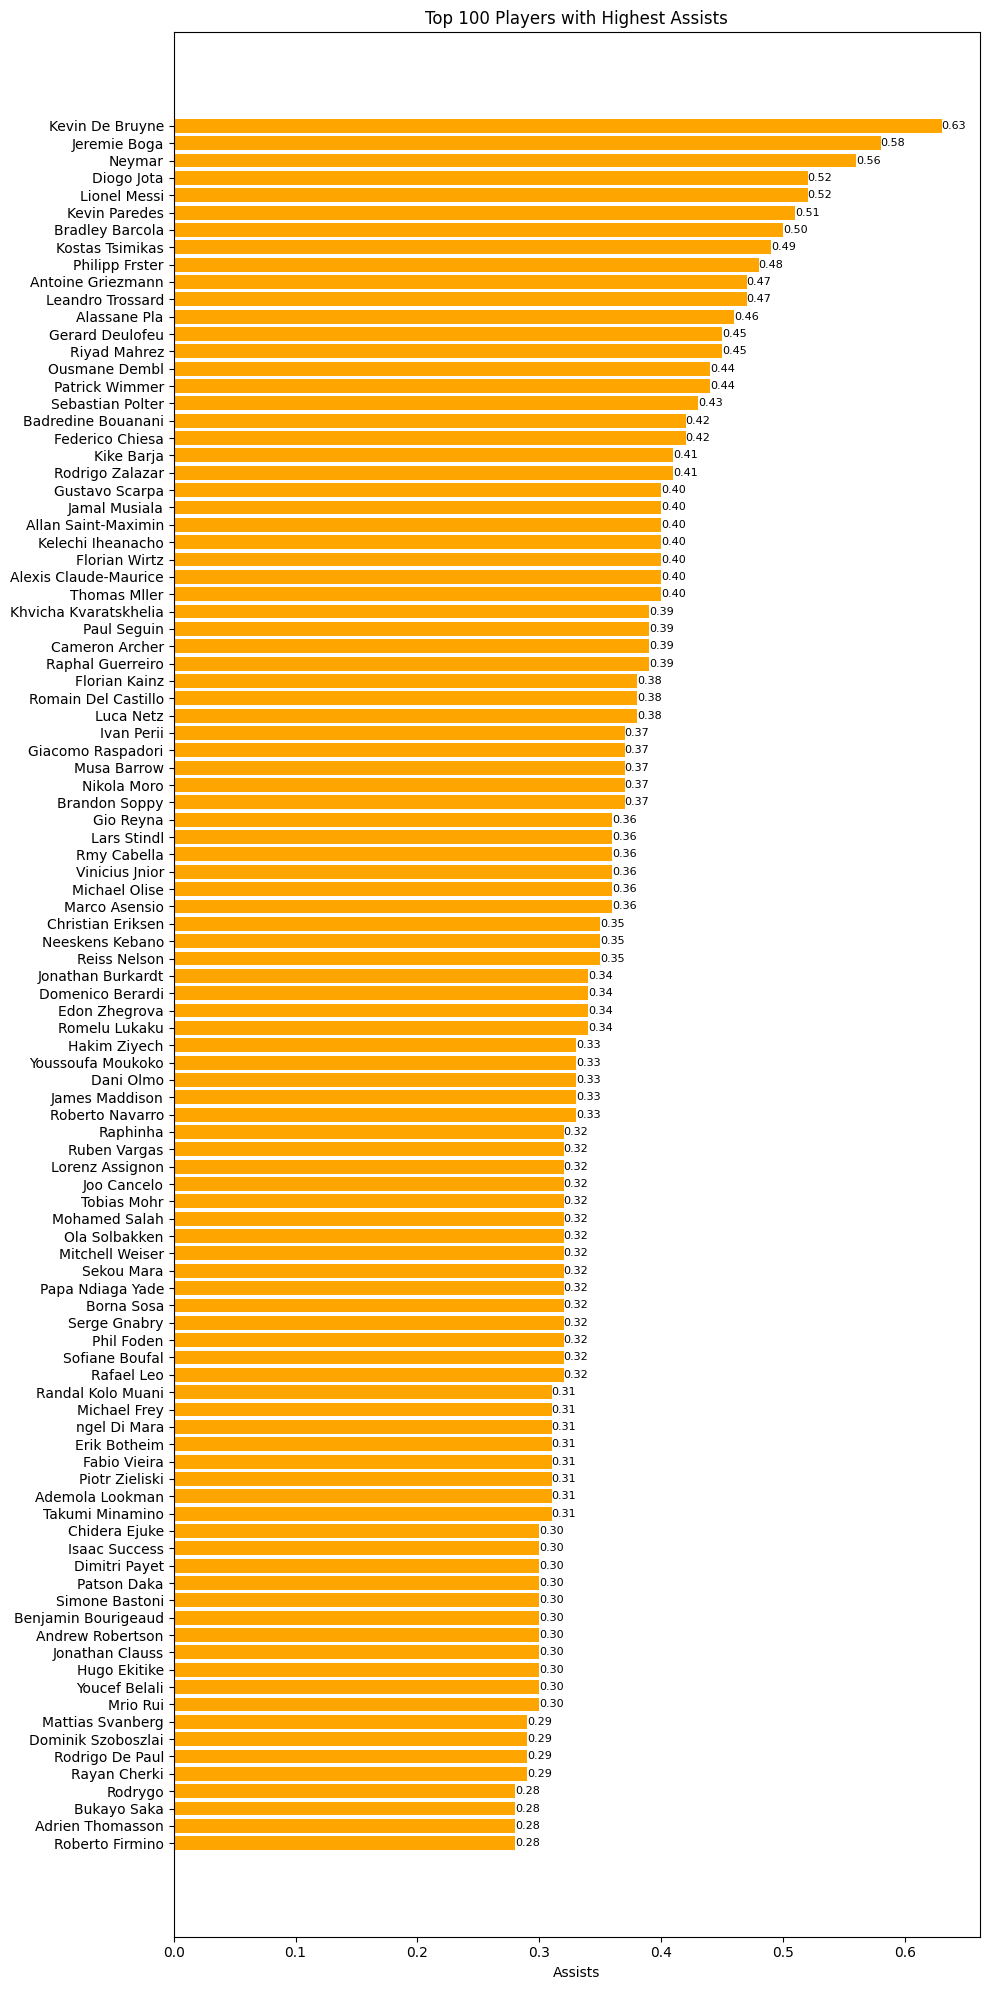

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Atur font agar kompatibel dengan karakter non-ASCII
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

# 1. Filter hanya pemain Non-GK
df_nongk = df_all[df_all['Position'] != 'Goalkeeper'].copy()

# 2. Urutkan berdasarkan (Attr_3)
top_assist = df_nongk[['Name', 'Attr_3']].sort_values(by='Attr_3', ascending=False).head(100)

# (Opsional) Bersihkan nama pemain dari karakter non-ASCII jika error font tetap muncul
top_assist['Name'] = top_assist['Name'].apply(lambda x: x.encode('ascii', errors='ignore').decode())

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 20))
bars = plt.barh(top_assist['Name'], top_assist['Attr_3'], color='orange')

# Tambahkan label nilai goal di ujung bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=8)

# Judul dan label
plt.xlabel('Assists')
plt.title('Top 100 Players with Highest Assists')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


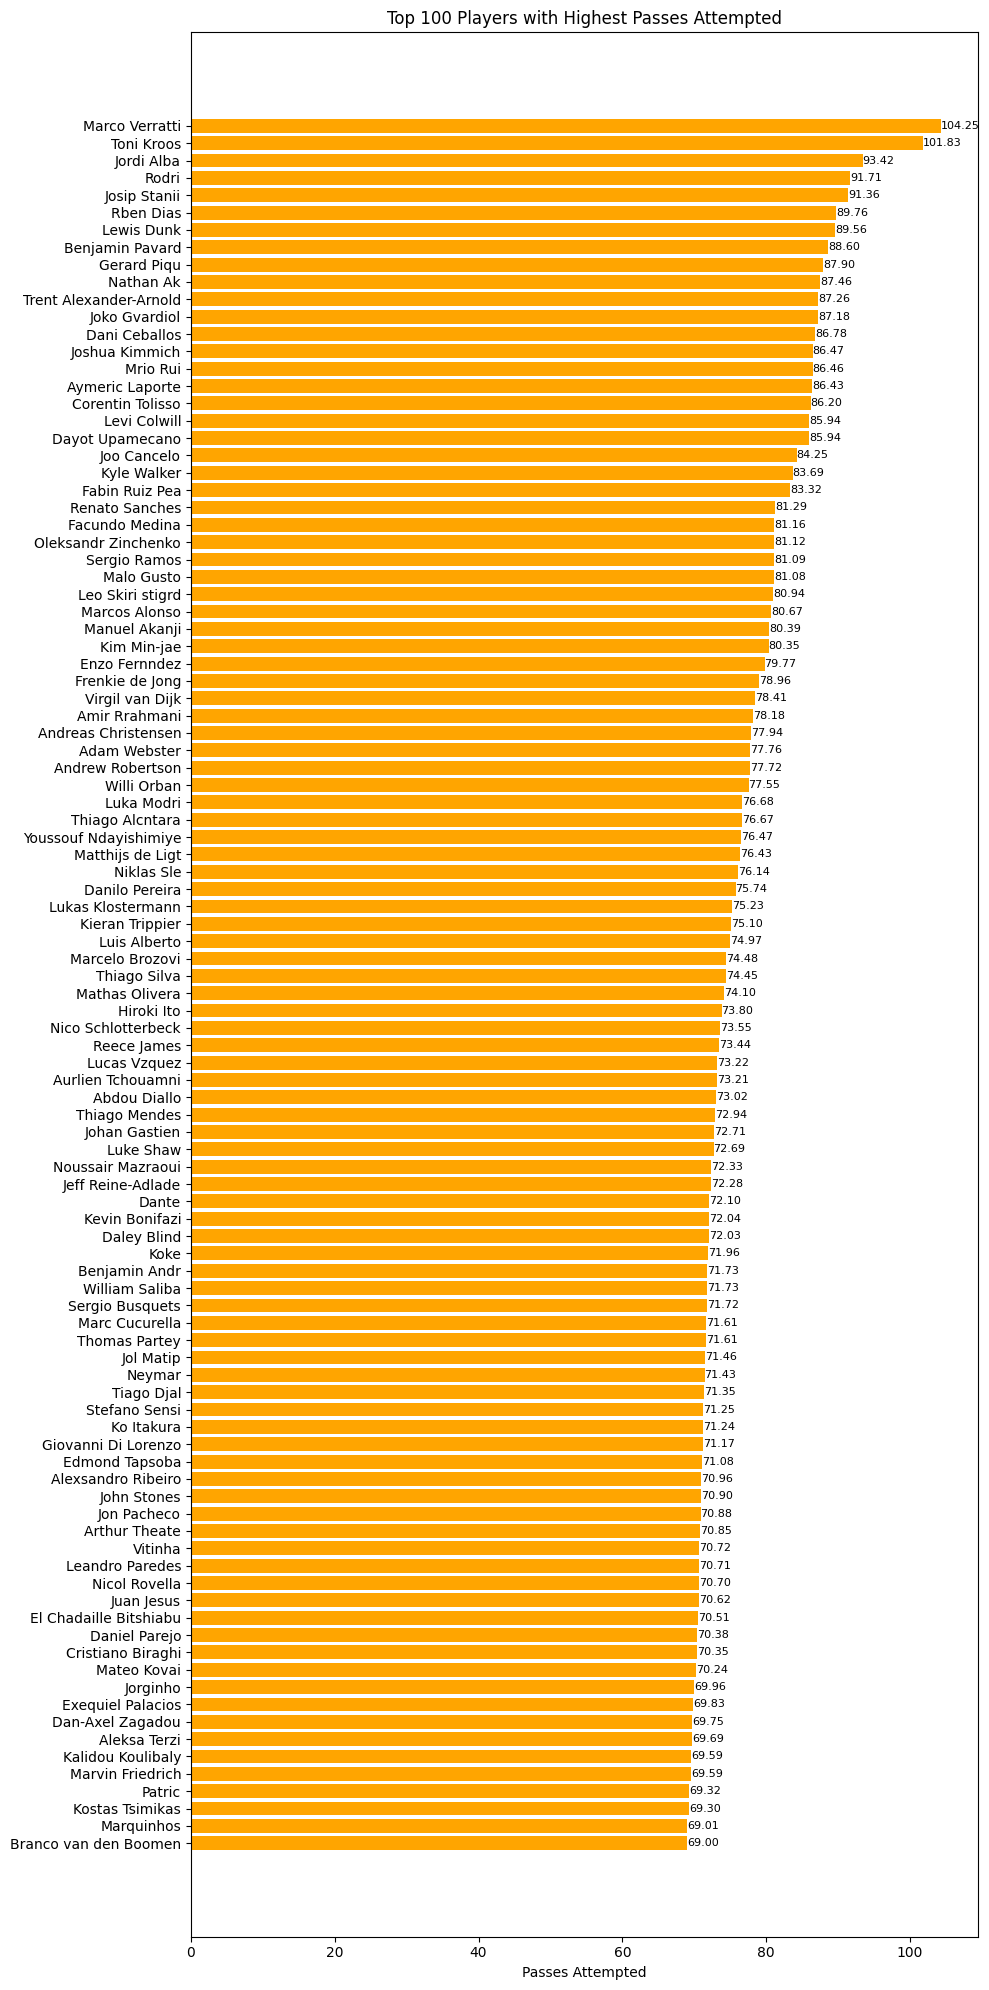

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Atur font agar kompatibel dengan karakter non-ASCII
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

# 1. Filter hanya pemain Non-GK
df_nongk = df_all[df_all['Position'] != 'Goalkeeper'].copy()

# 2. Urutkan berdasarkan (Attr_7)
top_pass = df_nongk[['Name', 'Attr_7']].sort_values(by='Attr_7', ascending=False).head(100)

# (Opsional) Bersihkan nama pemain dari karakter non-ASCII jika error font tetap muncul
top_pass['Name'] = top_pass['Name'].apply(lambda x: x.encode('ascii', errors='ignore').decode())

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 20))
bars = plt.barh(top_pass['Name'], top_pass['Attr_7'], color='orange')

# Tambahkan label nilai goal di ujung bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=8)

# Judul dan label
plt.xlabel('Passes Attempted')
plt.title('Top 100 Players with Highest Passes Attempted')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


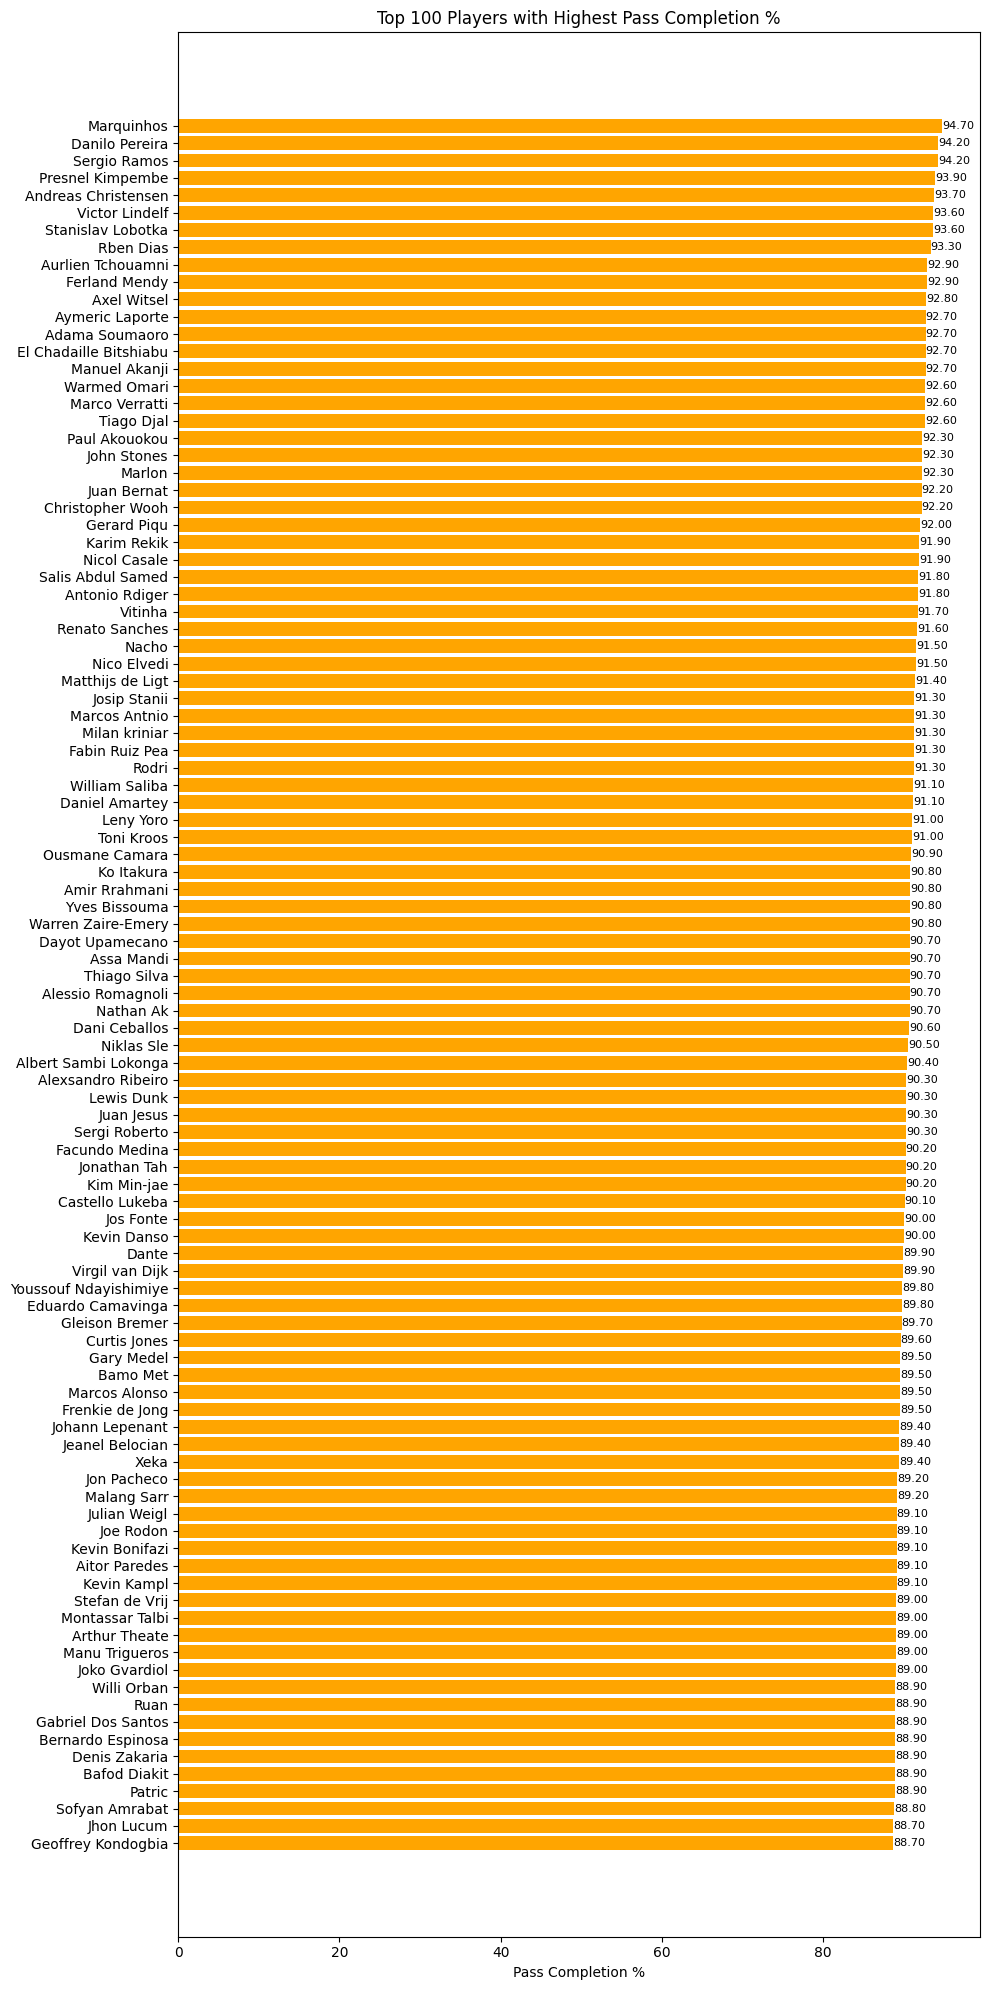

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Atur font agar kompatibel dengan karakter non-ASCII
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

# 1. Filter hanya pemain Non-GK
df_nongk = df_all[df_all['Position'] != 'Goalkeeper'].copy()

# 2. Urutkan berdasarkan (Attr_8)
top_pass1 = df_nongk[['Name', 'Attr_8']].sort_values(by='Attr_8', ascending=False).head(100)

# (Opsional) Bersihkan nama pemain dari karakter non-ASCII jika error font tetap muncul
top_pass1['Name'] = top_pass1['Name'].apply(lambda x: x.encode('ascii', errors='ignore').decode())

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 20))
bars = plt.barh(top_pass1['Name'], top_pass1['Attr_8'], color='orange')

# Tambahkan label nilai goal di ujung bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=8)

# Judul dan label
plt.xlabel('Pass Completion %')
plt.title('Top 100 Players with Highest Pass Completion %')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


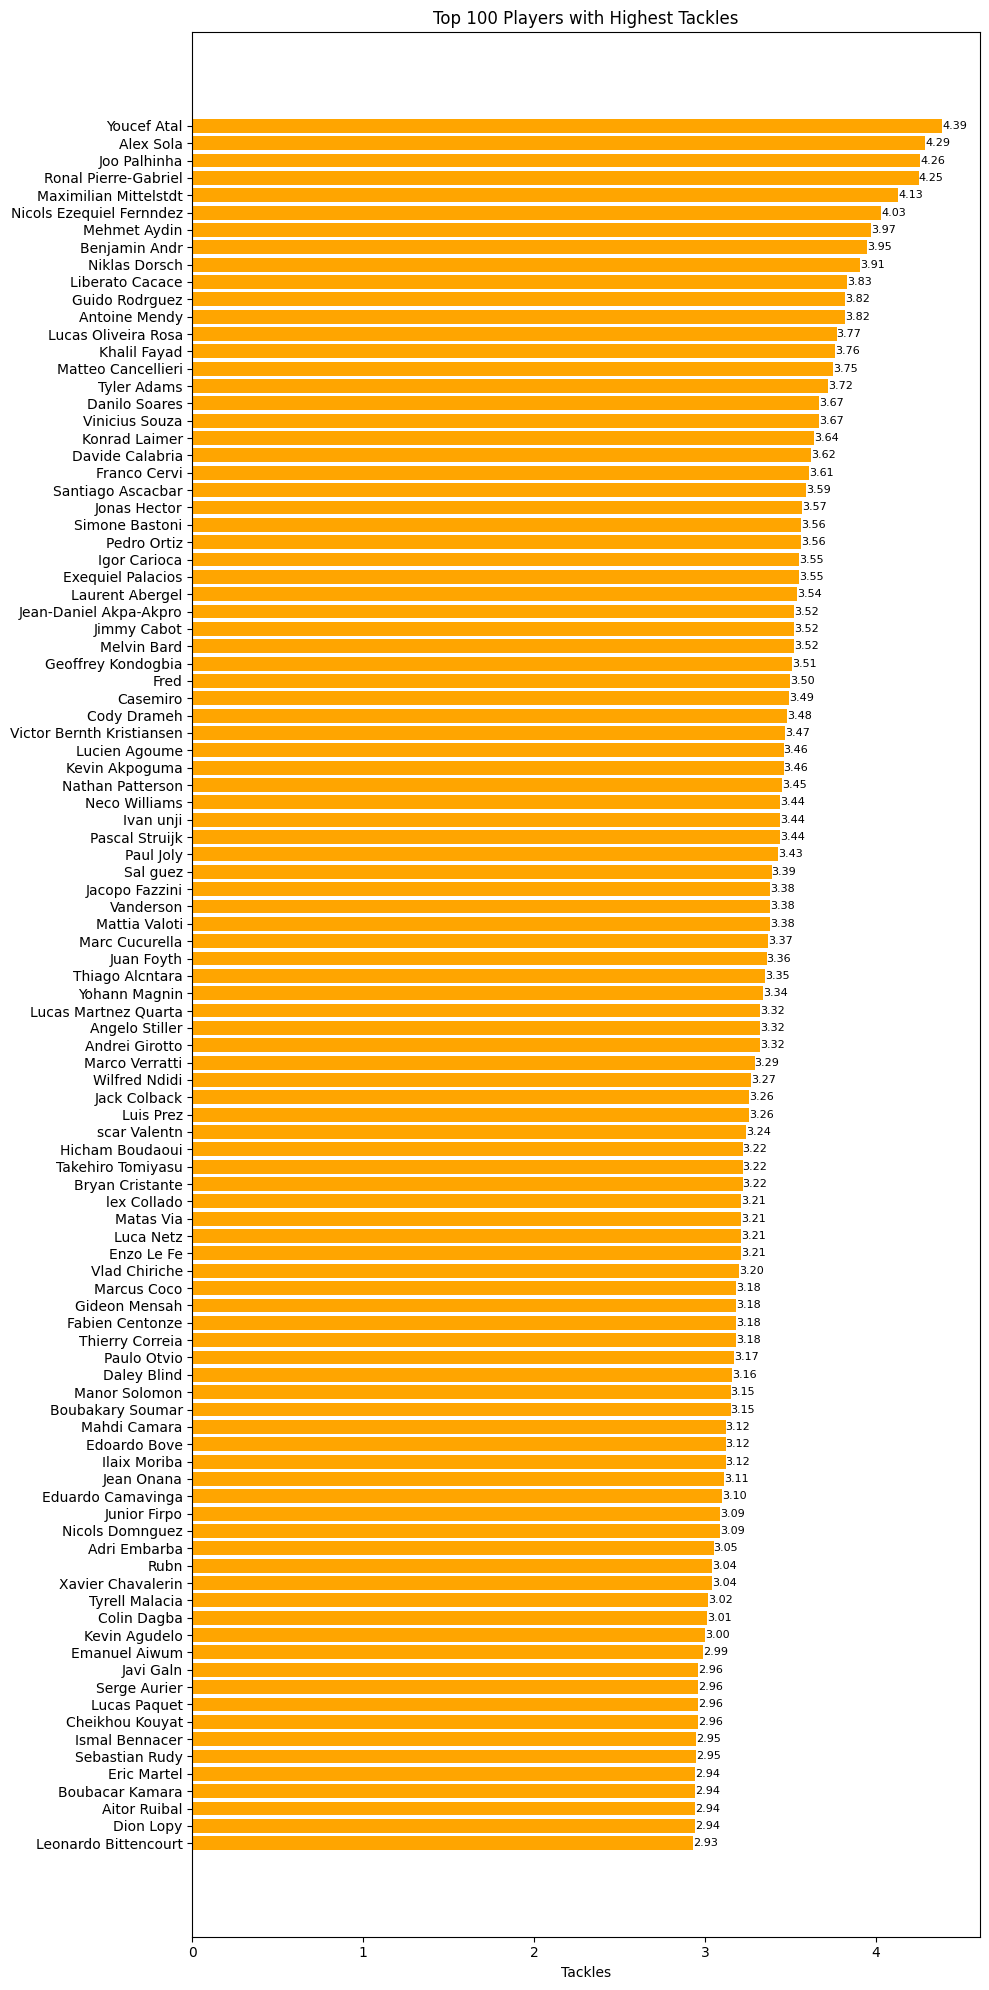

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Atur font agar kompatibel dengan karakter non-ASCII
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

# 1. Filter hanya pemain Non-GK
df_nongk = df_all[df_all['Position'] != 'Goalkeeper'].copy()

# 2. Urutkan berdasarkan (Attr_14)
top_tackles = df_nongk[['Name', 'Attr_14']].sort_values(by='Attr_14', ascending=False).head(100)

# (Opsional) Bersihkan nama pemain dari karakter non-ASCII jika error font tetap muncul
top_tackles['Name'] = top_tackles['Name'].apply(lambda x: x.encode('ascii', errors='ignore').decode())

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 20))
bars = plt.barh(top_tackles['Name'], top_tackles['Attr_14'], color='orange')

# Tambahkan label nilai goal di ujung bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=8)

# Judul dan label
plt.xlabel('Tackles')
plt.title('Top 100 Players with Highest Tackles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


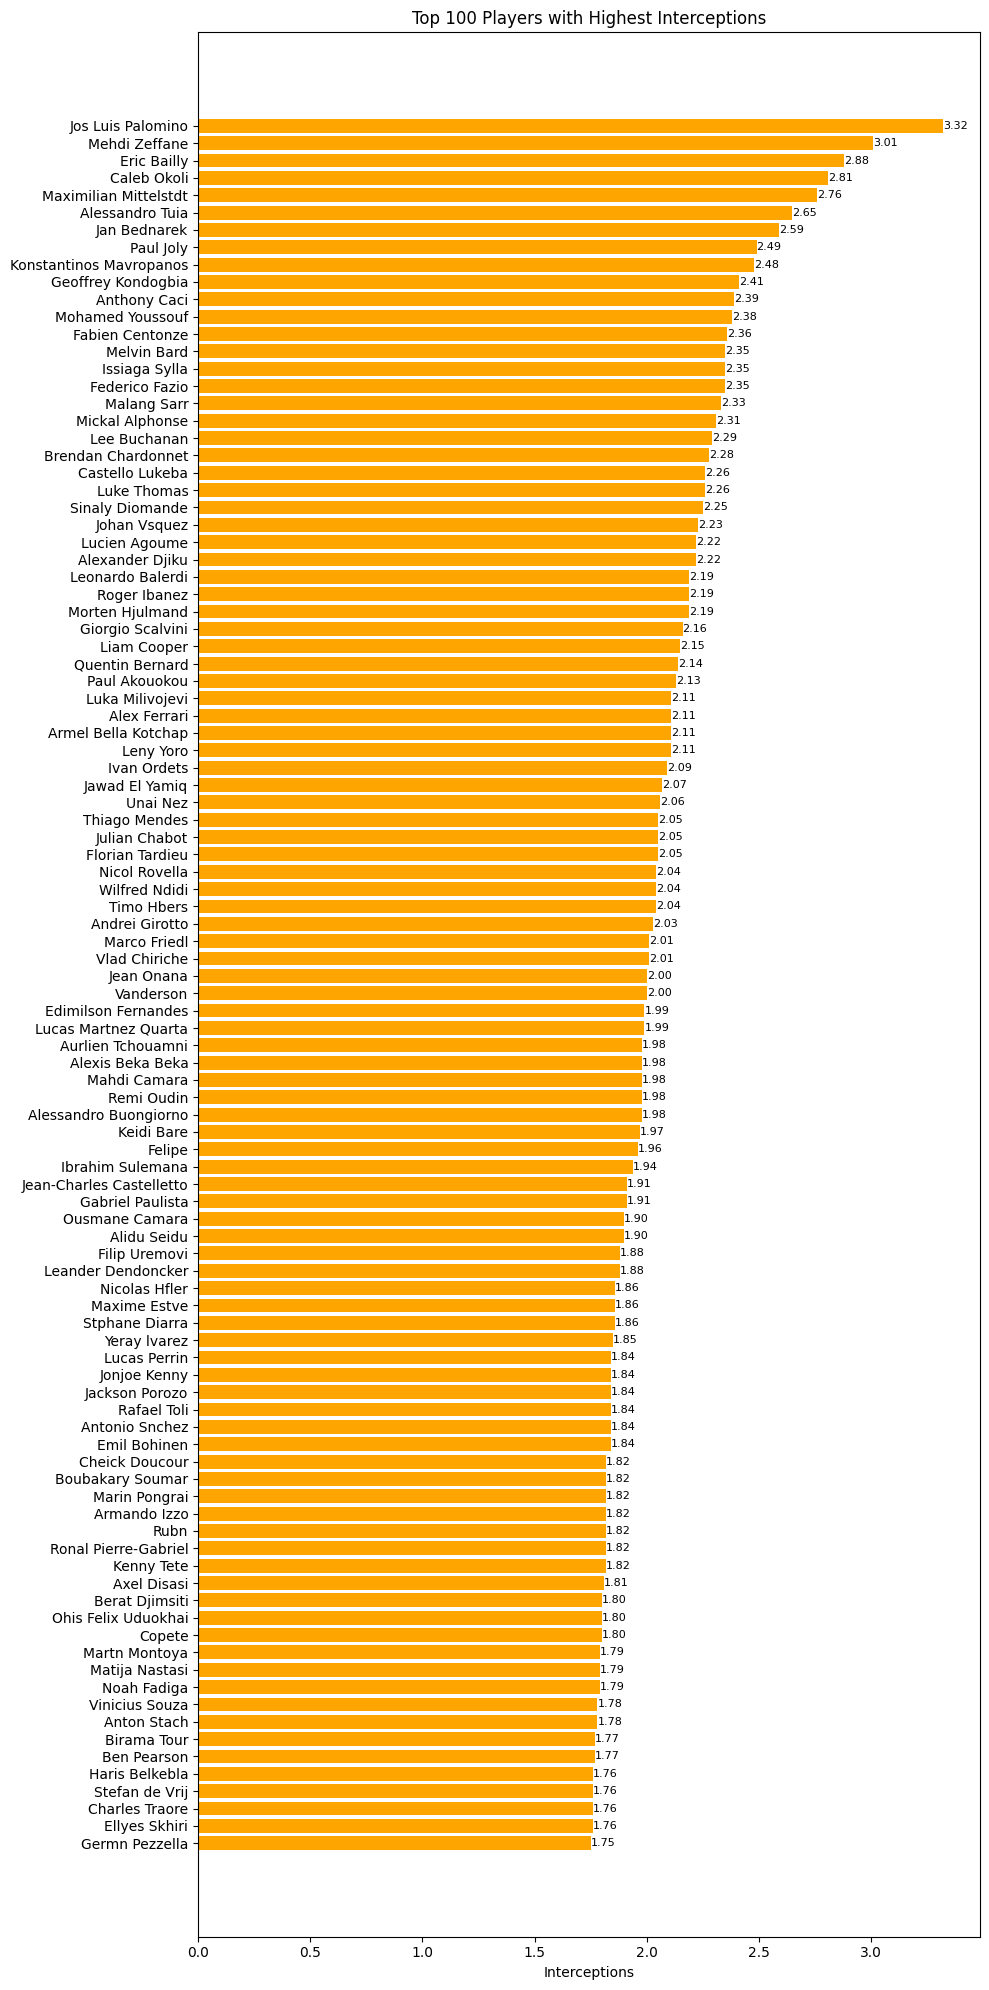

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Atur font agar kompatibel dengan karakter non-ASCII
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

# 1. Filter hanya pemain Non-GK
df_nongk = df_all[df_all['Position'] != 'Goalkeeper'].copy()

# 2. Urutkan berdasarkan (Attr_15)
top_interceptions = df_nongk[['Name', 'Attr_15']].sort_values(by='Attr_15', ascending=False).head(100)

# (Opsional) Bersihkan nama pemain dari karakter non-ASCII jika error font tetap muncul
top_interceptions['Name'] = top_interceptions['Name'].apply(lambda x: x.encode('ascii', errors='ignore').decode())

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 20))
bars = plt.barh(top_interceptions['Name'], top_interceptions['Attr_15'], color='orange')

# Tambahkan label nilai goal di ujung bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=8)

# Judul dan label
plt.xlabel('Interceptions')
plt.title('Top 100 Players with Highest Interceptions')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


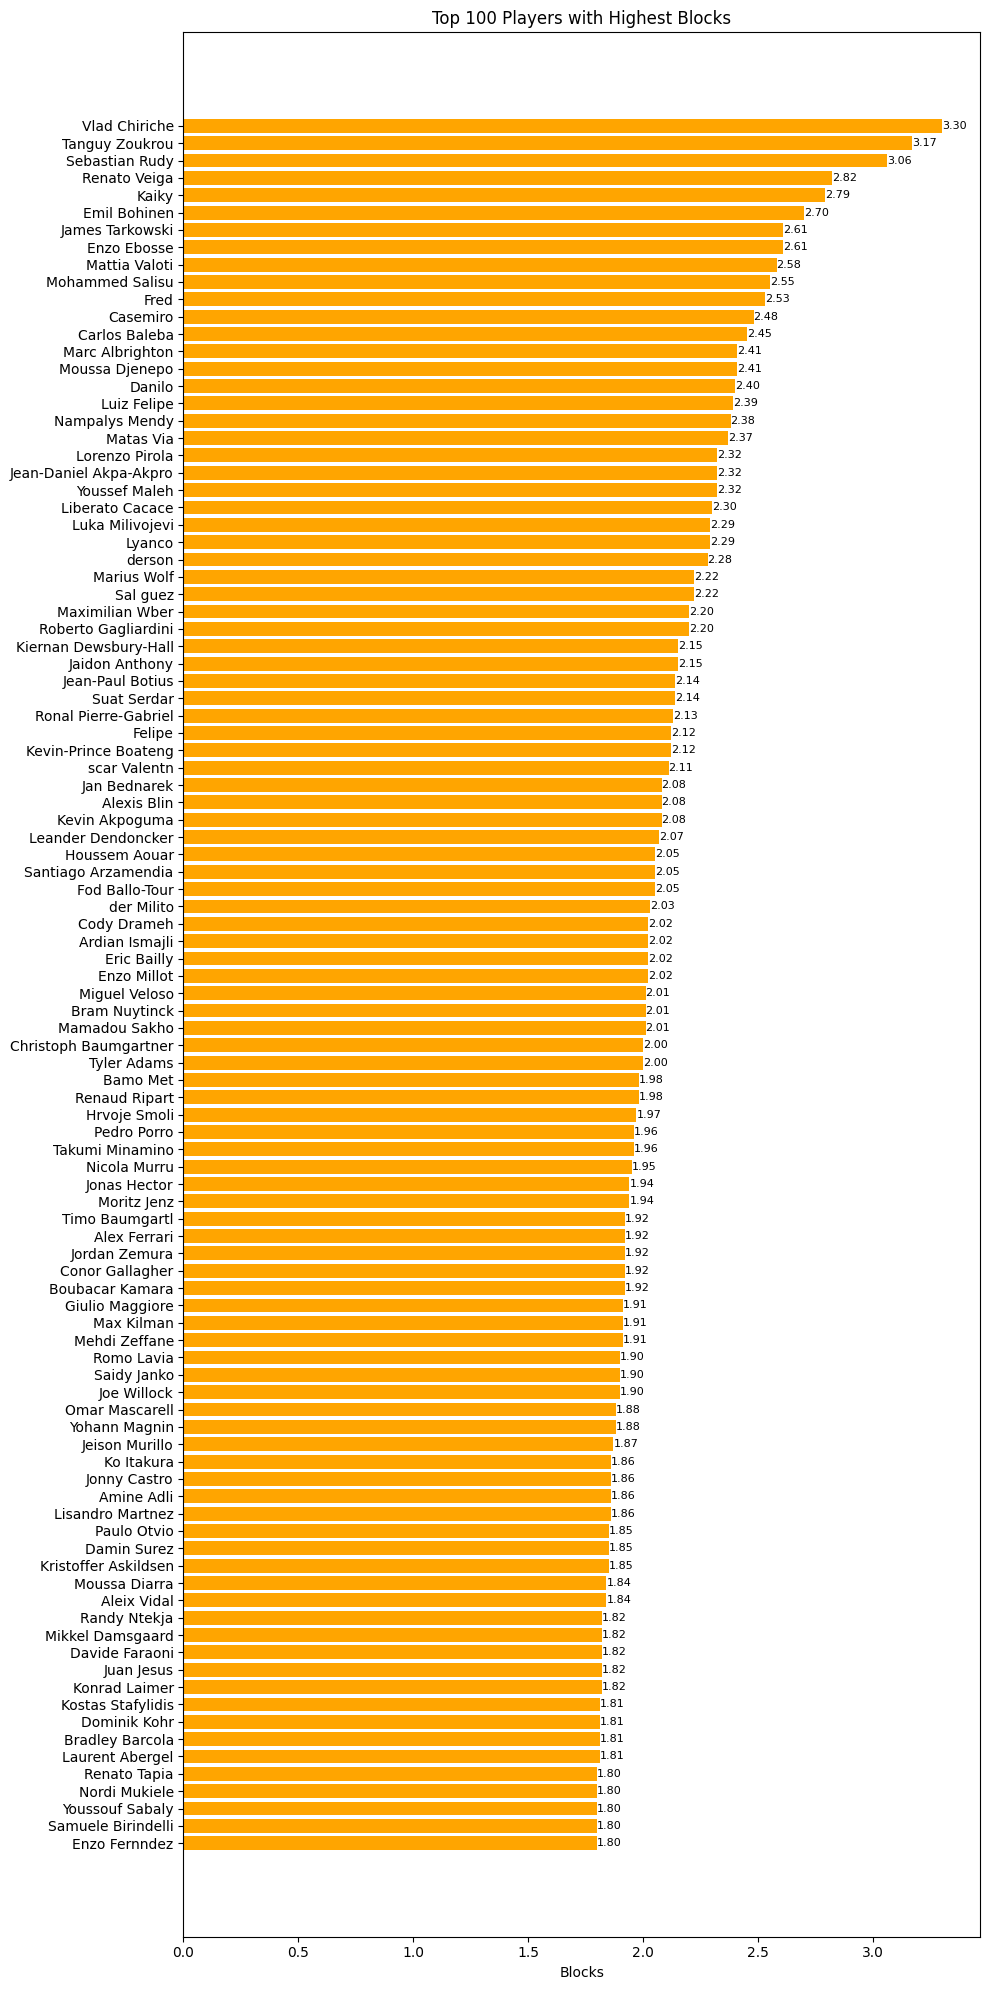

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Atur font agar kompatibel dengan karakter non-ASCII
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

# 1. Filter hanya pemain Non-GK
df_nongk = df_all[df_all['Position'] != 'Goalkeeper'].copy()

# 2. Urutkan berdasarkan (Attr_16)
top_Block = df_nongk[['Name', 'Attr_16']].sort_values(by='Attr_16', ascending=False).head(100)

# (Opsional) Bersihkan nama pemain dari karakter non-ASCII jika error font tetap muncul
top_Block['Name'] = top_Block['Name'].apply(lambda x: x.encode('ascii', errors='ignore').decode())

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 20))
bars = plt.barh(top_Block['Name'], top_Block['Attr_16'], color='orange')

# Tambahkan label nilai goal di ujung bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=8)

# Judul dan label
plt.xlabel('Blocks')
plt.title('Top 100 Players with Highest Blocks')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


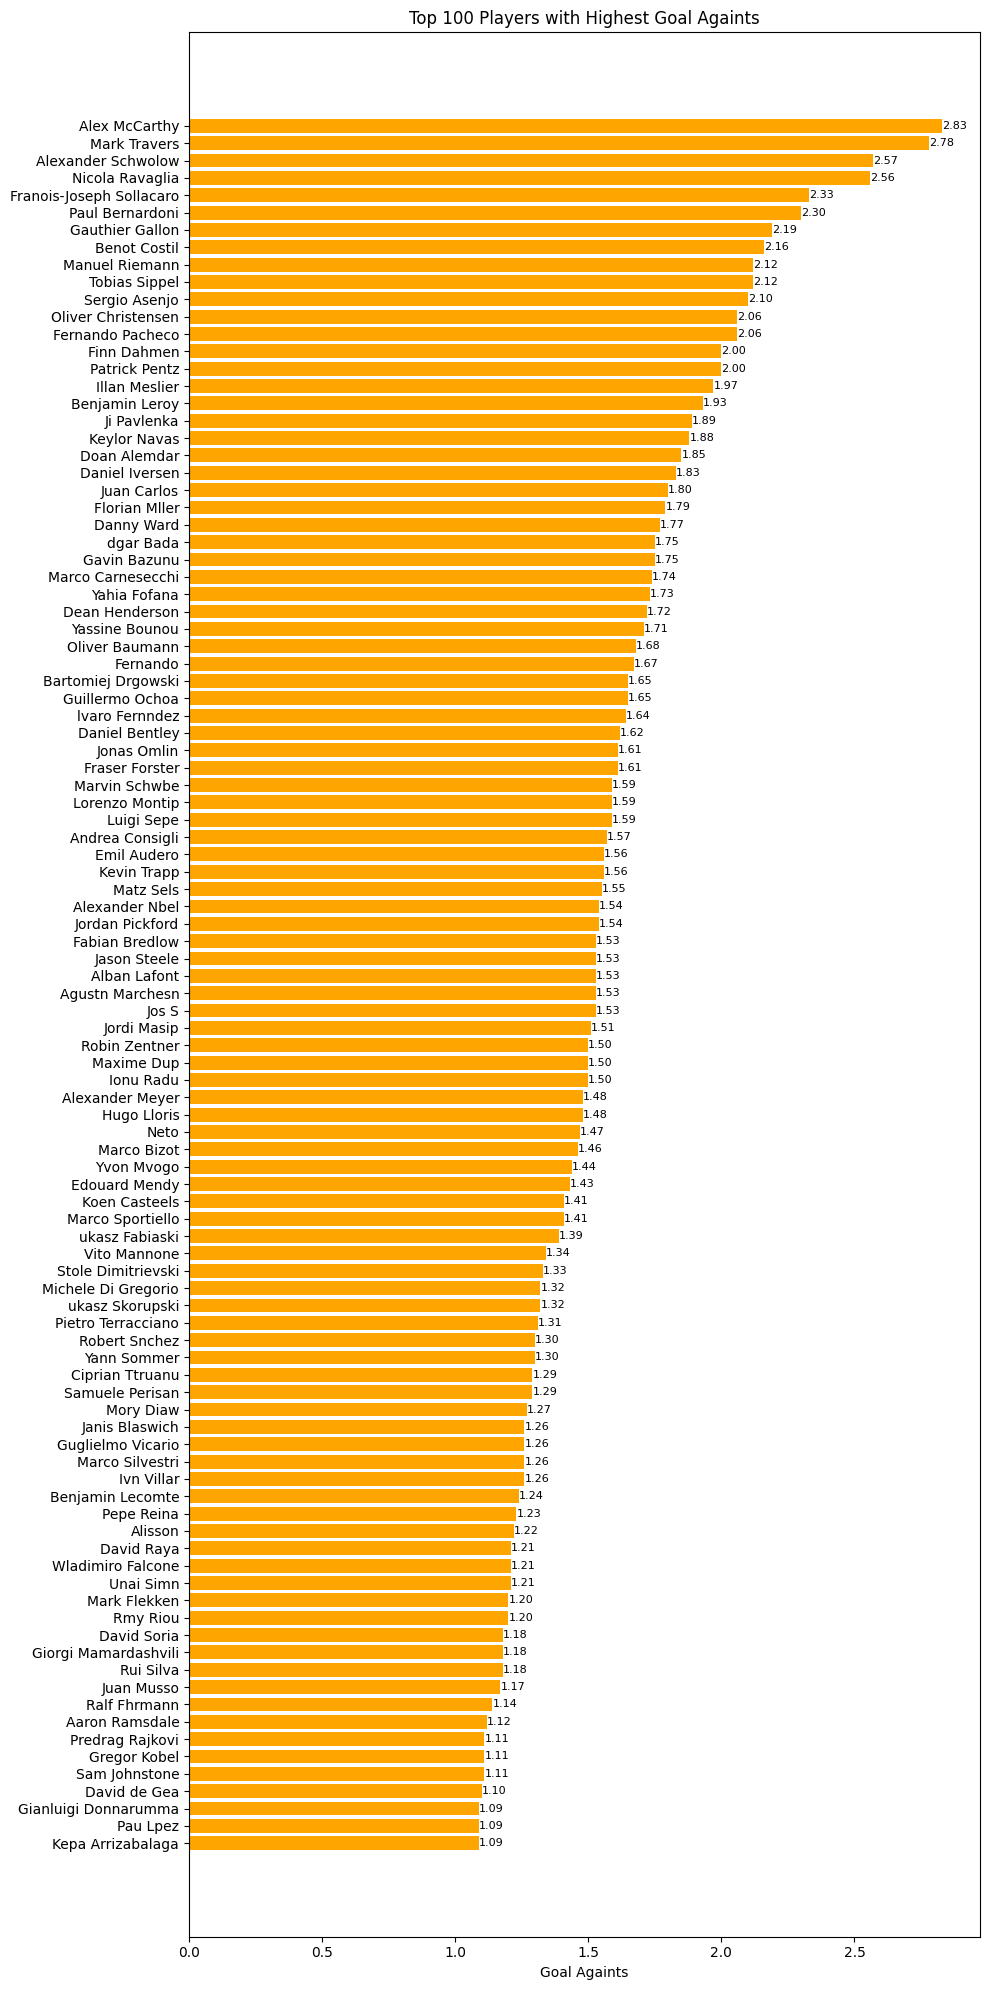

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Atur font agar kompatibel dengan karakter non-ASCII
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

# 1. Filter hanya pemain GK
df_gk = df_all[df_all['Position'] == 'Goalkeeper'].copy()

# 2. Urutkan berdasarkan Goals Against(Attr_1)
top_GA = df_gk[['Name', 'Attr_1']].sort_values(by='Attr_1', ascending=False).head(100)

# (Opsional) Bersihkan nama pemain dari karakter non-ASCII jika error font tetap muncul
top_GA['Name'] = top_GA['Name'].apply(lambda x: x.encode('ascii', errors='ignore').decode())

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 20))
bars = plt.barh(top_GA['Name'], top_GA['Attr_1'], color='orange')

# Tambahkan label nilai goal di ujung bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=8)

# Judul dan label
plt.xlabel('Goal Againts')
plt.title('Top 100 Players with Highest Goal Againts')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


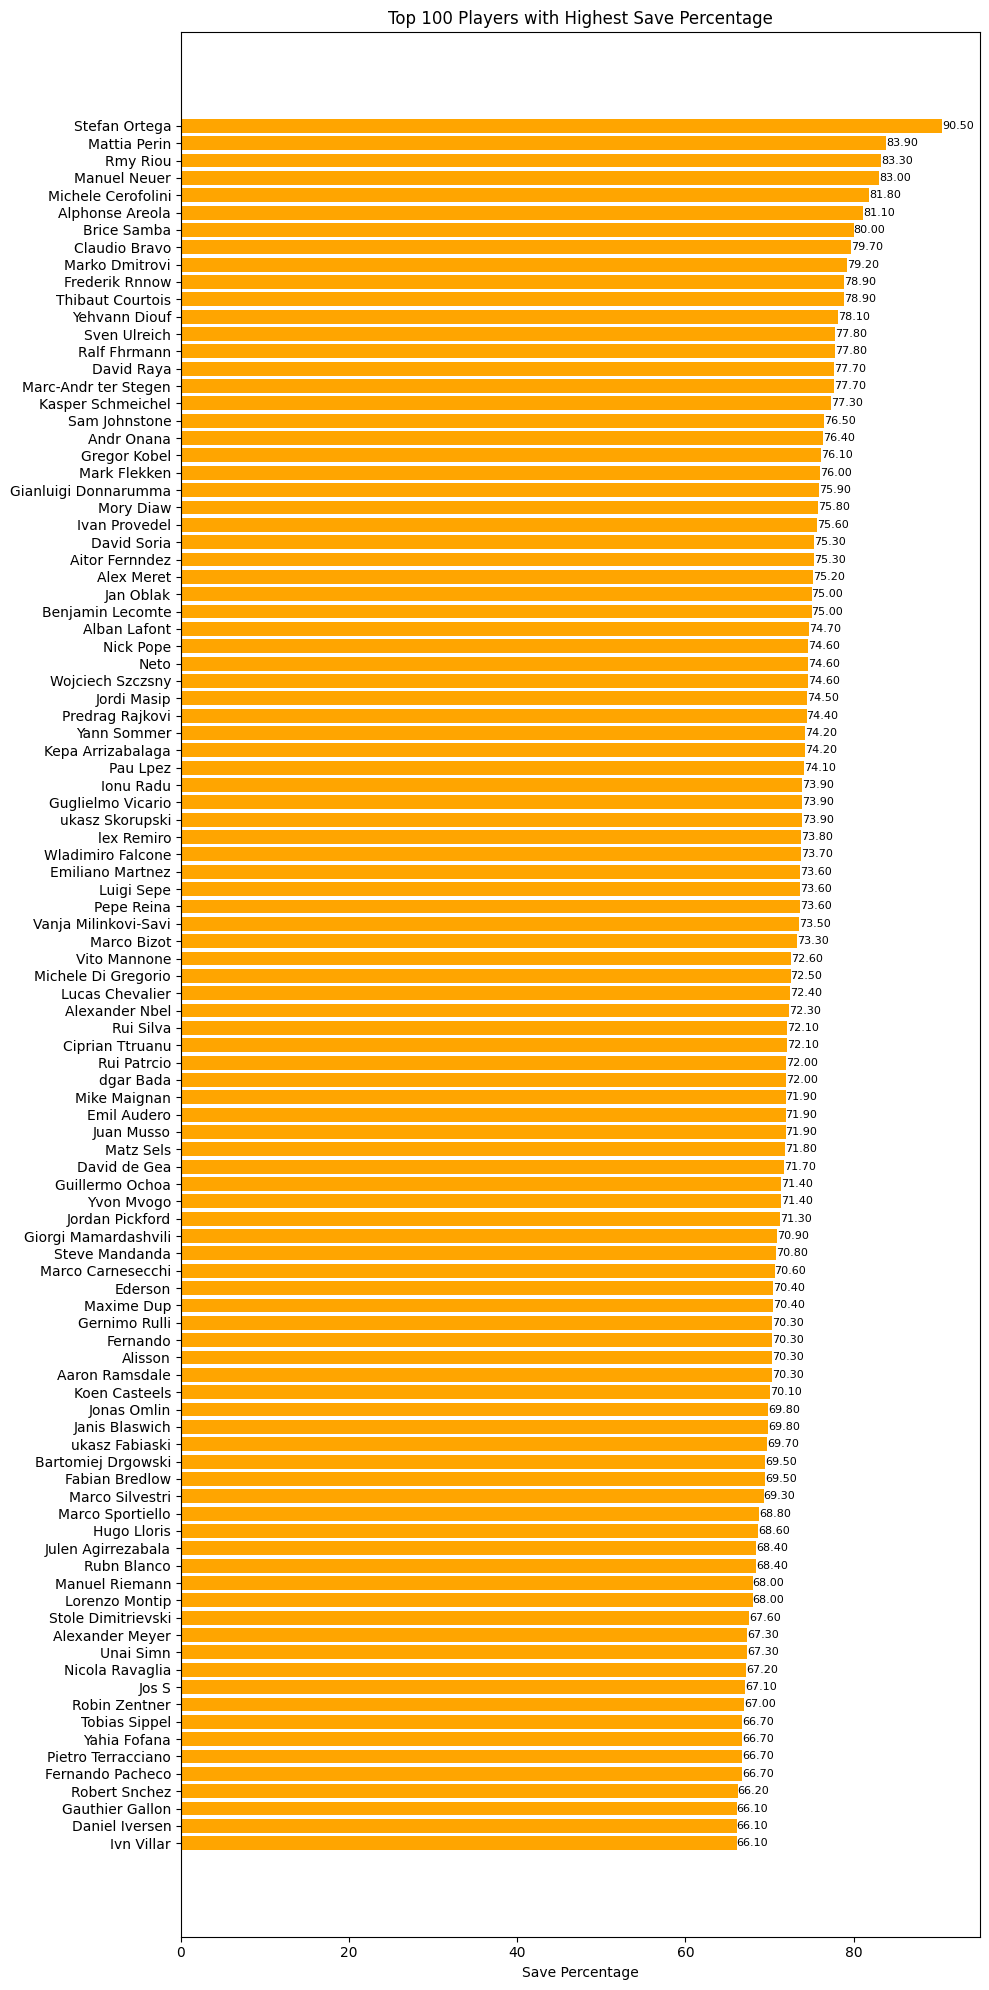

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Atur font agar kompatibel dengan karakter non-ASCII
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

# 1. Filter hanya pemain GK
df_gk = df_all[df_all['Position'] == 'Goalkeeper'].copy()

# 2. Urutkan berdasarkan Save Percentage(Attr_2)
top_SP = df_gk[['Name', 'Attr_2']].sort_values(by='Attr_2', ascending=False).head(100)

# (Opsional) Bersihkan nama pemain dari karakter non-ASCII jika error font tetap muncul
top_SP['Name'] = top_SP['Name'].apply(lambda x: x.encode('ascii', errors='ignore').decode())

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 20))
bars = plt.barh(top_SP['Name'], top_SP['Attr_2'], color='orange')

# Tambahkan label nilai goal di ujung bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=8)

# Judul dan label
plt.xlabel('Save Percentage')
plt.title('Top 100 Players with Highest Save Percentage')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


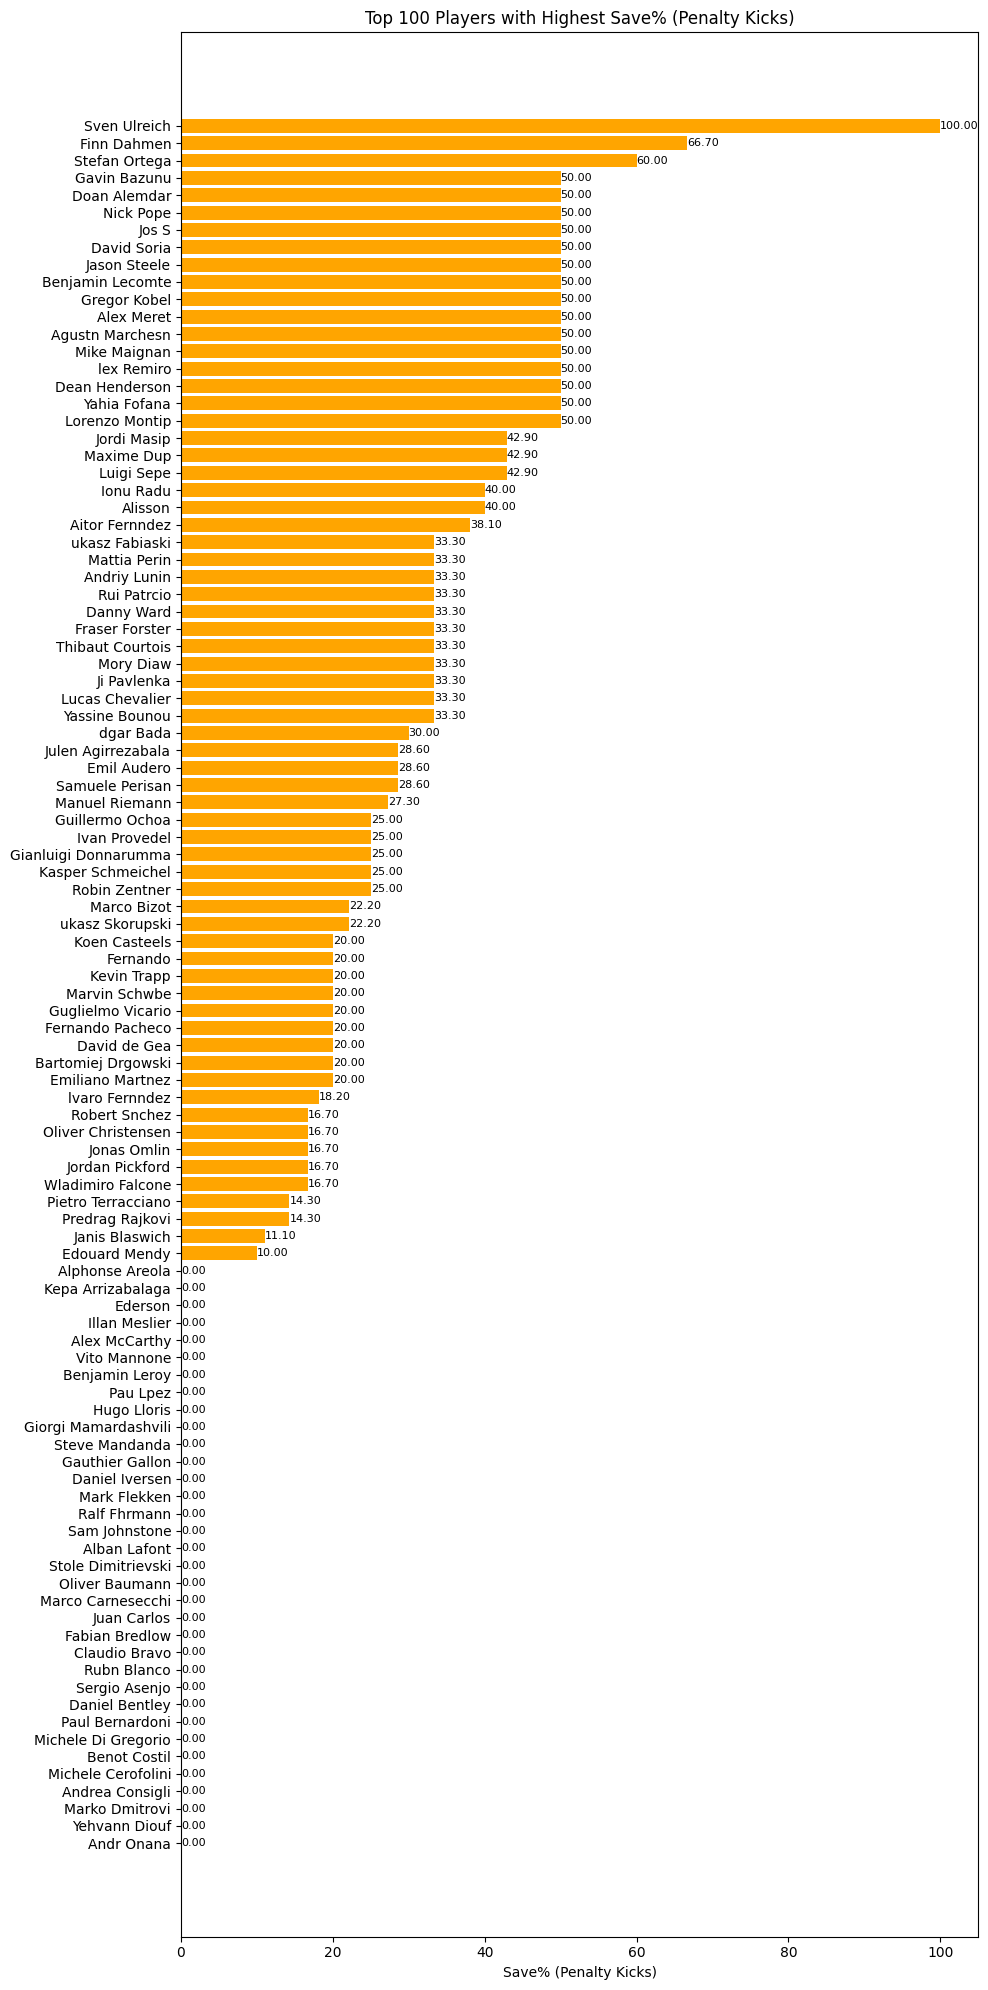

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Atur font agar kompatibel dengan karakter non-ASCII
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

# 1. Filter hanya pemain GK
df_gk = df_all[df_all['Position'] == 'Goalkeeper'].copy()

# 2. Urutkan berdasarkan Save% (Penalty Kicks)(Attr_4)
top_Save = df_gk[['Name', 'Attr_4']].sort_values(by='Attr_4', ascending=False).head(100)

# (Opsional) Bersihkan nama pemain dari karakter non-ASCII jika error font tetap muncul
top_Save['Name'] = top_Save['Name'].apply(lambda x: x.encode('ascii', errors='ignore').decode())

# 3. Plot horizontal bar chart
plt.figure(figsize=(10, 20))
bars = plt.barh(top_Save['Name'], top_Save['Attr_4'], color='orange')

# Tambahkan label nilai goal di ujung bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=8)

# Judul dan label
plt.xlabel('Save% (Penalty Kicks)')
plt.title('Top 100 Players with Highest Save% (Penalty Kicks)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


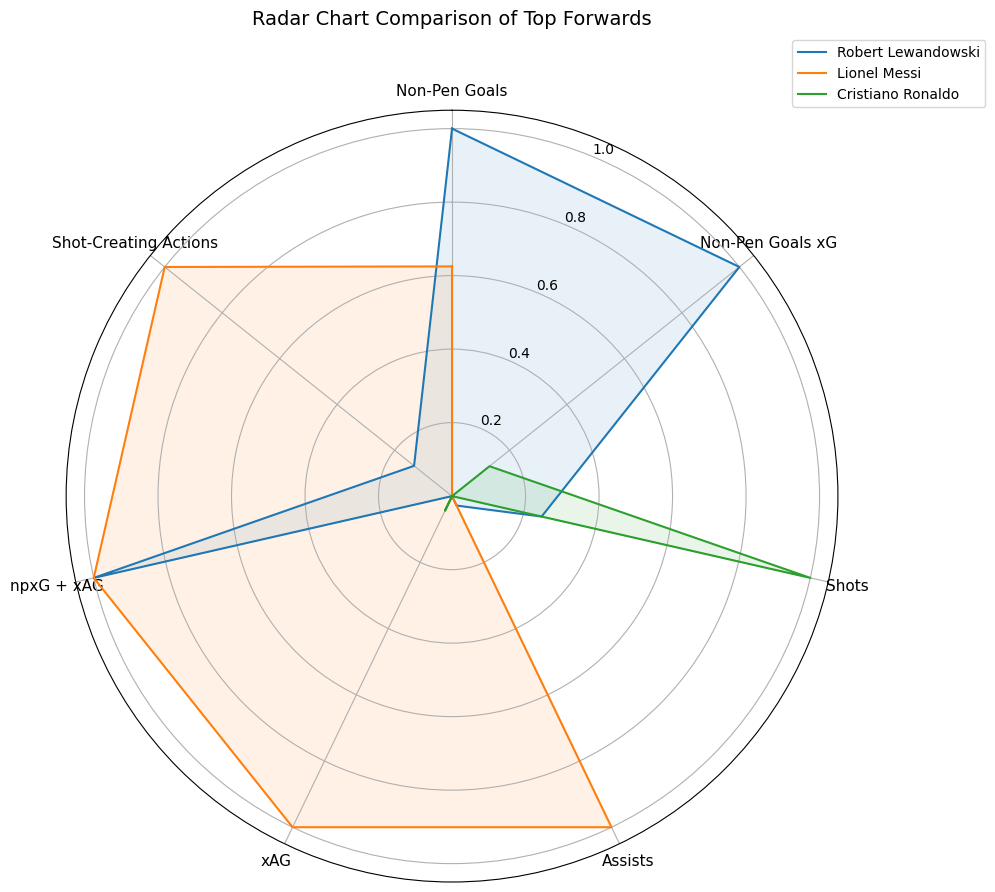

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pilih pemain yang ingin dibandingkan
players = ['Cristiano Ronaldo', 'Lionel Messi', 'Robert Lewandowski']

# Atribut yang ingin ditampilkan
attributes = ['Attr_0', 'Attr_1', 'Attr_2', 'Attr_3', 'Attr_4', 'Attr_5', 'Attr_6']
labels = ['Non-Pen Goals','Non-Pen Goals xG', 'Shots', 'Assists', 'xAG', 'npxG + xAG', 'Shot-Creating Actions']

# Ambil data pemain
data = df_all[df_all['Name'].isin(players)][['Name'] + attributes].set_index('Name')

# Normalisasi 0-1 (min-max) per kolom agar adil
data_normalized = (data - data.min()) / (data.max() - data.min())

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
angles += angles[:1]  # tutup lingkaran

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for player in data_normalized.index:
    values = data_normalized.loc[player].tolist()
    values += values[:1]  # tutup lingkaran
    ax.plot(angles, values, label=player)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=11)
plt.title('Radar Chart Comparison of Top Forwards', y=1.1, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


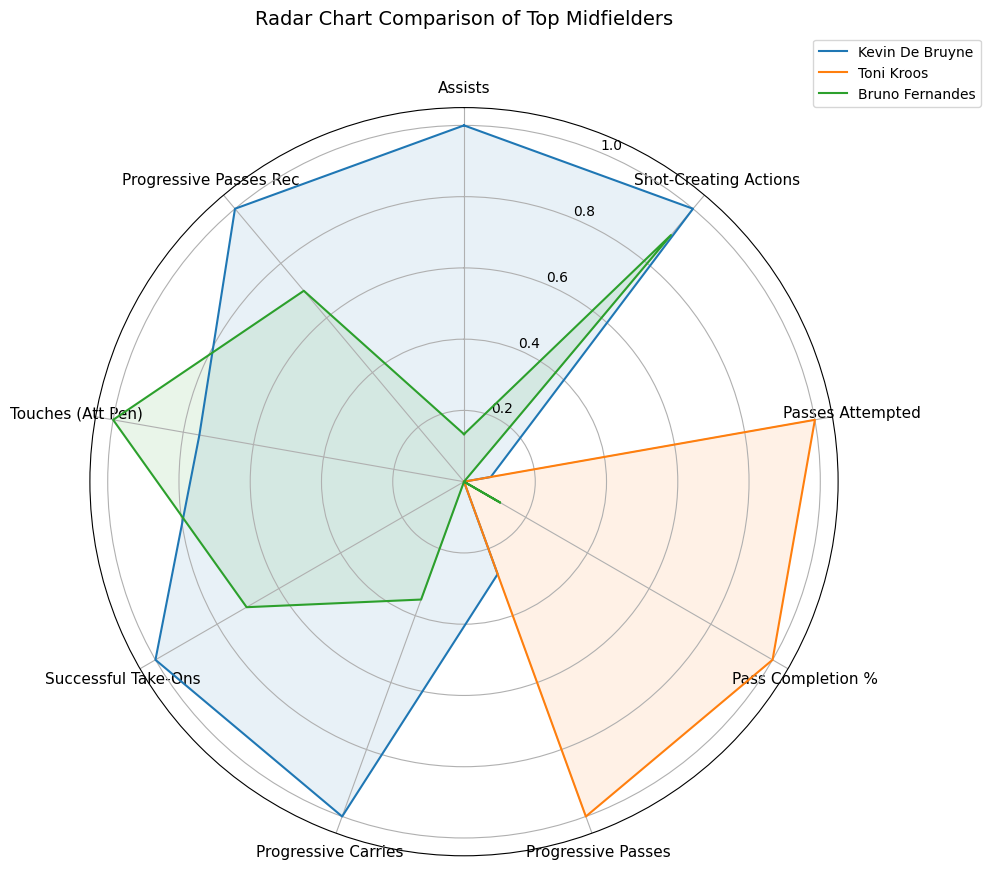

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pilih pemain yang ingin dibandingkan
players = ['Kevin De Bruyne', 'Bruno Fernandes', 'Toni Kroos']

# Atribut yang ingin ditampilkan
attributes = ['Attr_3', 'Attr_6', 'Attr_7', 'Attr_8', 'Attr_9', 'Attr_10', 'Attr_11'
              , 'Attr_12', 'Attr_13']
labels = ['Assists', 'Shot-Creating Actions', 'Passes Attempted', 'Pass Completion %'
          , 'Progressive Passes', 'Progressive Carries', 'Successful Take-Ons'
          , 'Touches (Att Pen)', 'Progressive Passes Rec']

# Ambil data pemain
data = df_all[df_all['Name'].isin(players)][['Name'] + attributes].set_index('Name')

# Normalisasi 0-1 (min-max) per kolom agar adil
data_normalized = (data - data.min()) / (data.max() - data.min())

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
angles += angles[:1]  # tutup lingkaran

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for player in data_normalized.index:
    values = data_normalized.loc[player].tolist()
    values += values[:1]  # tutup lingkaran
    ax.plot(angles, values, label=player)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=11)
plt.title('Radar Chart Comparison of Top Midfielders', y=1.1, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


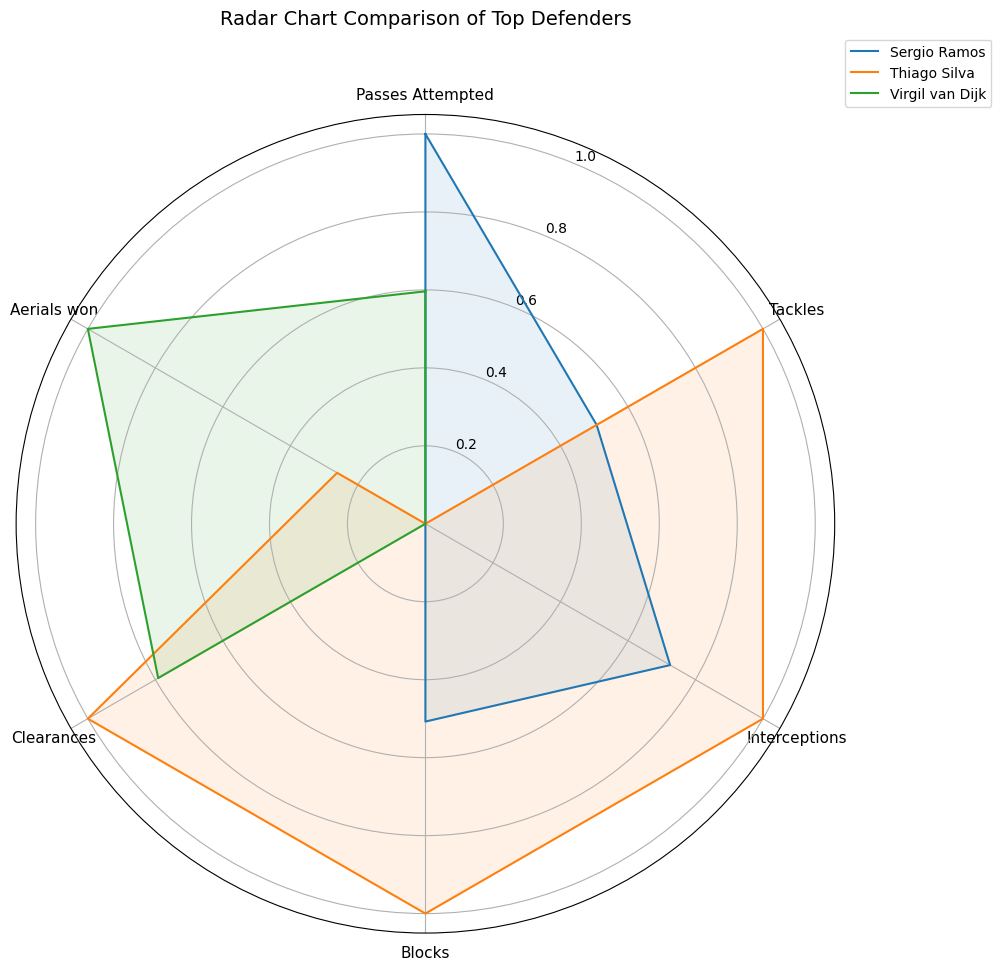

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Pilih pemain yang ingin dibandingkan
players = ['Thiago Silva', 'Sergio Ramos', 'Virgil van Dijk']

# Atribut yang ingin ditampilkan
attributes = ['Attr_7', 'Attr_14', 'Attr_15', 'Attr_16', 'Attr_17', 'Attr_18']
labels = ['Passes Attempted', 'Tackles', 'Interceptions', 'Blocks', 'Clearances', 'Aerials won']

# Ambil data pemain
data = df_all[df_all['Name'].isin(players)][['Name'] + attributes].set_index('Name')

# Normalisasi 0-1 (min-max) per kolom agar adil
data_normalized = (data - data.min()) / (data.max() - data.min())

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
angles += angles[:1]  # tutup lingkaran

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for player in data_normalized.index:
    values = data_normalized.loc[player].tolist()
    values += values[:1]  # tutup lingkaran
    ax.plot(angles, values, label=player)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=11)
plt.title('Radar Chart Comparison of Top Defenders', y=1.1, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


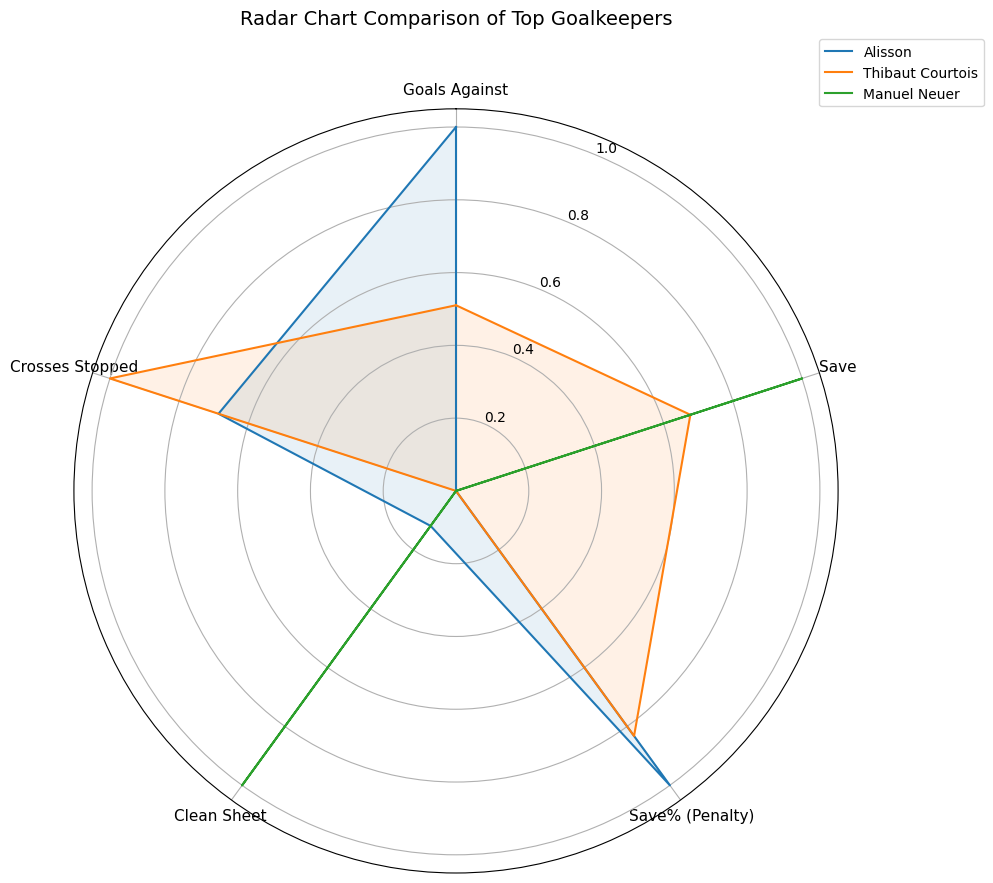

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Pilih pemain yang ingin dibandingkan
players = ['Alisson', 'Manuel Neuer', 'Thibaut Courtois']

# Atribut yang ingin ditampilkan
attributes = ['Attr_1', 'Attr_2', 'Attr_4', 'Attr_5', 'Attr_10']
labels = ['Goals Against', 'Save', 'Save% (Penalty)', 'Clean Sheet', 'Crosses Stopped']

# Ambil data pemain
data = df_all[df_all['Name'].isin(players)][['Name'] + attributes].set_index('Name')

# Normalisasi 0-1 (min-max) per kolom agar adil
data_normalized = (data - data.min()) / (data.max() - data.min())

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
angles += angles[:1]  # tutup lingkaran

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for player in data_normalized.index:
    values = data_normalized.loc[player].tolist()
    values += values[:1]  # tutup lingkaran
    ax.plot(angles, values, label=player)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=11)
plt.title('Radar Chart Comparison of Top Goalkeepers', y=1.1, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()
